## SMS_Spam_Classification

In [1]:
import pandas as pd
import numpy as np


### Data_set

In [2]:
df = pd.read_csv('spam.csv', encoding='ISO-8859-1')
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [3]:
df.shape

(5572, 5)

Agenda
1. data cleaning
2. EDA
3. text preprocessing
4. model building
5. Evaluation
6. Improvement
7. website
- Deploy

## 1. Data Cleaning
In this section, we'll clean the dataset by handling missing values, correcting inconsistencies, and preparing the data for analysis.

```python
# Data cleaning code here


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [5]:
df.drop(columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], inplace=True)

In [6]:
df.head(2)

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   v1      5572 non-null   object
 1   v2      5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [8]:
# renamming the columns
df.rename(columns={'v1':'target', 'v2':'text'}, inplace=True)

In [9]:
df.sample(5)

,target,text
805,ham,I dled 3d its very imp
3064,ham,"Sounds good, keep me posted"
2225,ham,Alrite jod hows the revision goin? Keris bin d...
4014,spam,You will be receiving this week's Triple Echo ...
2046,ham,"Aight fuck it, I'll get it later"


In [10]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df['target'] = encoder.fit_transform(df['target'])

In [11]:
df.sample(4)

,target,text
239,1,U 447801259231 have a secret admirer who is lo...
3444,0,wiskey Brandy Rum Gin Beer Vodka Scotch Shampa...
4233,0,Now only i reached home. . . I am very tired n...
5382,0,"I can make it up there, squeezed &lt;#&gt; b..."


In [12]:
#check for missing values
df.isnull().sum()

target    0
text      0
dtype: int64

In [13]:
#check for duplicate value
df = df.drop_duplicates(keep='first')

In [14]:
df.duplicated().sum()

0

## 2 EDA

In [15]:
df['target'].value_counts()

0    4516
1     653
Name: target, dtype: int64

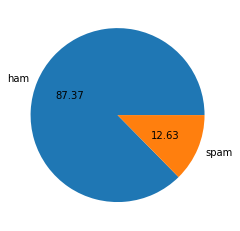

In [16]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(), labels=['ham', 'spam'], autopct='%0.2f')
plt.show()

Imbanced DATA 

In [17]:
import nltk

In [18]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [19]:
df['num_characters'] = df['text'].apply(len)

In [20]:
df.sample(4)

,target,text,num_characters
3389,1,Please CALL 08712402972 immediately as there i...,81
509,0,Your opinion about me? 1. Over 2. Jada 3. Kusr...,136
1684,0,Do you want bold 2 or bb torch,30
1410,0,Pls speak to that customer machan.,34


In [21]:
df['text'].apply(lambda x: nltk.word_tokenize(x))

0       [Go, until, jurong, point, ,, crazy, .., Avail...
1                [Ok, lar, ..., Joking, wif, u, oni, ...]
2       [Free, entry, in, 2, a, wkly, comp, to, win, F...
3       [U, dun, say, so, early, hor, ..., U, c, alrea...
4       [Nah, I, do, n't, think, he, goes, to, usf, ,,...
                              ...                        
5567    [This, is, the, 2nd, time, we, have, tried, 2,...
5568     [Will, Ì_, b, going, to, esplanade, fr, home, ?]
5569    [Pity, ,, *, was, in, mood, for, that, ., So, ...
5570    [The, guy, did, some, bitching, but, I, acted,...
5571                  [Rofl, ., Its, true, to, its, name]
Name: text, Length: 5169, dtype: object

In [22]:
# no of words 
df['num_words'] = df['text'].apply(lambda x: len(nltk.word_tokenize(x)))

In [23]:
df.head()

,target,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [24]:
df['num_sentences'] = df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [25]:
df.sample(5)

,target,text,num_characters,num_words,num_sentences
2881,0,Hi Harish's rent has been transfred to ur Acnt.,47,11,1
3157,0,Thank u. IT BETTER WORK OUT CAUSE I WILL FEEL ...,60,13,2
912,0,Can't. I feel nauseous. I'm so pissed. I didn'...,160,43,6
2973,0,"I'll text carlos and let you know, hang on",42,11,1
3824,0,Hi. I'm always online on yahoo and would like ...,70,16,2


In [26]:
df[['num_characters', 'num_words', 'num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455407,1.961308
std,58.236293,13.322448,1.432583
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [27]:
df[df['target']==0][['num_characters', 'num_words', 'num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123339,1.815545
std,56.358207,13.491315,1.364098
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


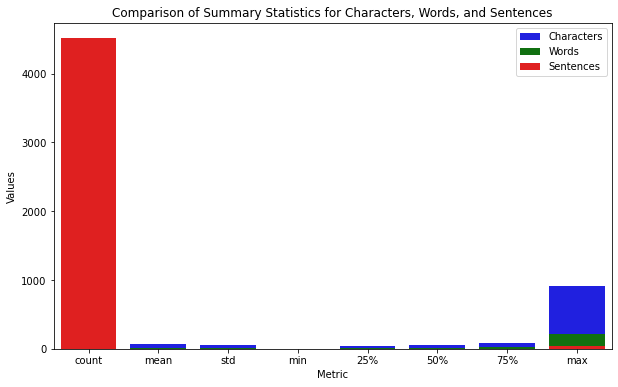

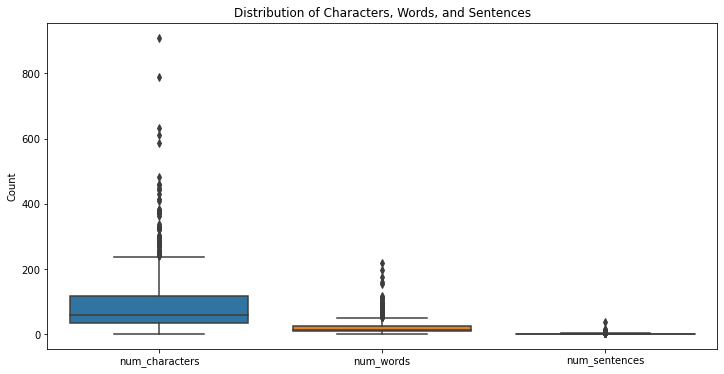

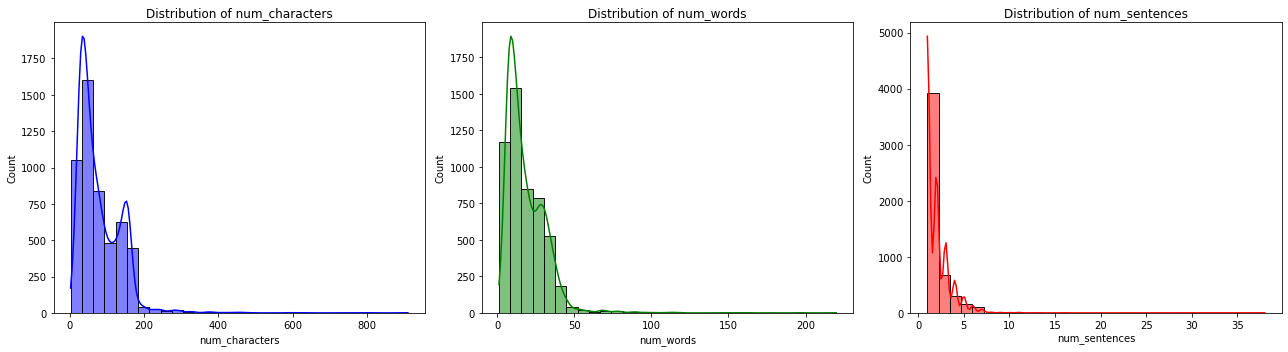

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Creating the DataFrame with summary statistics of ()
data = {
    'Metric': ['count', 'mean', 'std', 'min', '25%', '50%', '75%', 'max'],
    'num_characters': [4516, 70.46, 56.36, 2, 34, 52, 90, 910],
    'num_words': [4516, 17.12, 13.49, 1, 8, 13, 22, 220],
    'num_sentences': [4516, 1.82, 1.36, 1, 1, 1, 2, 38]
}

df_summary = pd.DataFrame(data)

# Bar Plot to Compare Mean Values
plt.figure(figsize=(10, 6))
sns.barplot(x='Metric', y='num_characters', data=df_summary, color='blue', label='Characters')
sns.barplot(x='Metric', y='num_words', data=df_summary, color='green', label='Words')
sns.barplot(x='Metric', y='num_sentences', data=df_summary, color='red', label='Sentences')

plt.title('Comparison of Summary Statistics for Characters, Words, and Sentences')
plt.ylabel('Values')
plt.legend()
plt.show()

# Box Plot for Distribution
plt.figure(figsize=(12, 6))
df_for_boxplot = df[['num_characters', 'num_words', 'num_sentences']]

sns.boxplot(data=df_for_boxplot)
plt.title('Distribution of Characters, Words, and Sentences')
plt.ylabel('Count')
plt.show()

# Histograms to Visualize Distribution
fig, axs = plt.subplots(1, 3, figsize=(18, 5))

sns.histplot(df['num_characters'], bins=30, color='blue', kde=True, ax=axs[0])
axs[0].set_title('Distribution of num_characters')

sns.histplot(df['num_words'], bins=30, color='green', kde=True, ax=axs[1])
axs[1].set_title('Distribution of num_words')

sns.histplot(df['num_sentences'], bins=30, color='red', kde=True, ax=axs[2])
axs[2].set_title('Distribution of num_sentences')

plt.tight_layout()
plt.show()


In [29]:
df[df['target']==1][['num_characters', 'num_words', 'num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.969372
std,30.137753,7.008418,1.488910
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


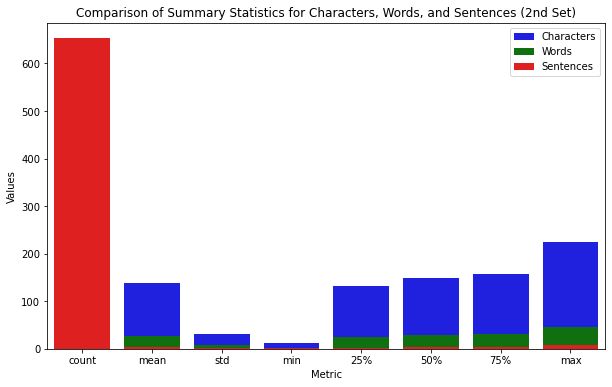

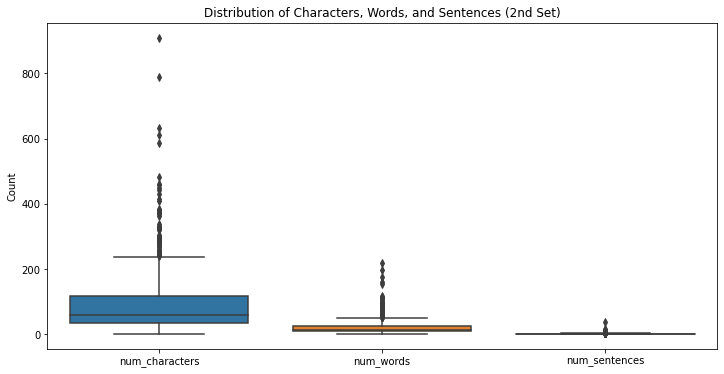

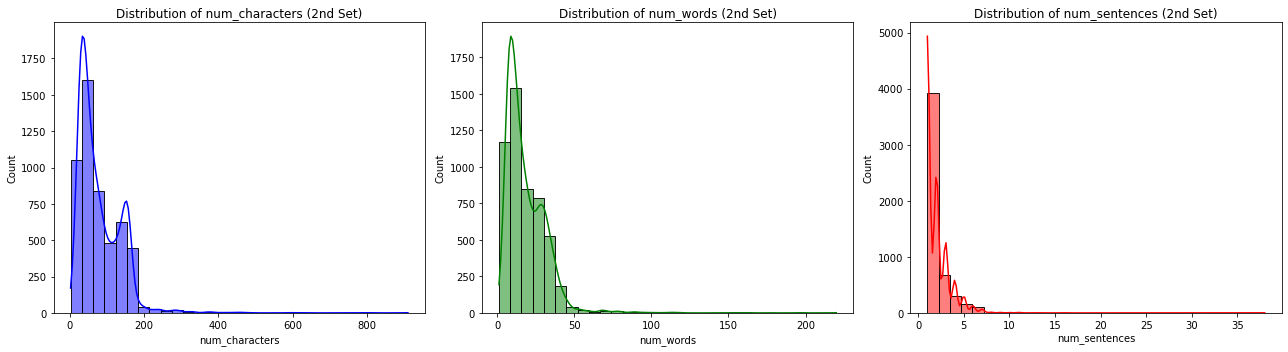

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Creating the DataFrame with the second summary statistics
data2 = {
    'Metric': ['count', 'mean', 'std', 'min', '25%', '50%', '75%', 'max'],
    'num_characters': [653, 137.89, 30.14, 13, 132, 149, 157, 224],
    'num_words': [653, 27.67, 7.01, 2, 25, 29, 32, 46],
    'num_sentences': [653, 2.97, 1.49, 1, 2, 3, 4, 9]
}

df_summary2 = pd.DataFrame(data2)

# Bar Plot to Compare Mean Values
plt.figure(figsize=(10, 6))
sns.barplot(x='Metric', y='num_characters', data=df_summary2, color='blue', label='Characters')
sns.barplot(x='Metric', y='num_words', data=df_summary2, color='green', label='Words')
sns.barplot(x='Metric', y='num_sentences', data=df_summary2, color='red', label='Sentences')

plt.title('Comparison of Summary Statistics for Characters, Words, and Sentences (2nd Set)')
plt.ylabel('Values')
plt.legend()
plt.show()

# Box Plot for Distribution
plt.figure(figsize=(12, 6))
df_for_boxplot2 = df[['num_characters', 'num_words', 'num_sentences']]

sns.boxplot(data=df_for_boxplot2)
plt.title('Distribution of Characters, Words, and Sentences (2nd Set)')
plt.ylabel('Count')
plt.show()

# Histograms to Visualize Distribution
fig, axs = plt.subplots(1, 3, figsize=(18, 5))

sns.histplot(df['num_characters'], bins=30, color='blue', kde=True, ax=axs[0])
axs[0].set_title('Distribution of num_characters (2nd Set)')

sns.histplot(df['num_words'], bins=30, color='green', kde=True, ax=axs[1])
axs[1].set_title('Distribution of num_words (2nd Set)')

sns.histplot(df['num_sentences'], bins=30, color='red', kde=True, ax=axs[2])
axs[2].set_title('Distribution of num_sentences (2nd Set)')

plt.tight_layout()
plt.show()


### visualistion

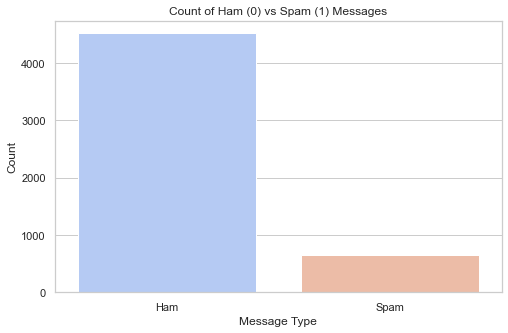

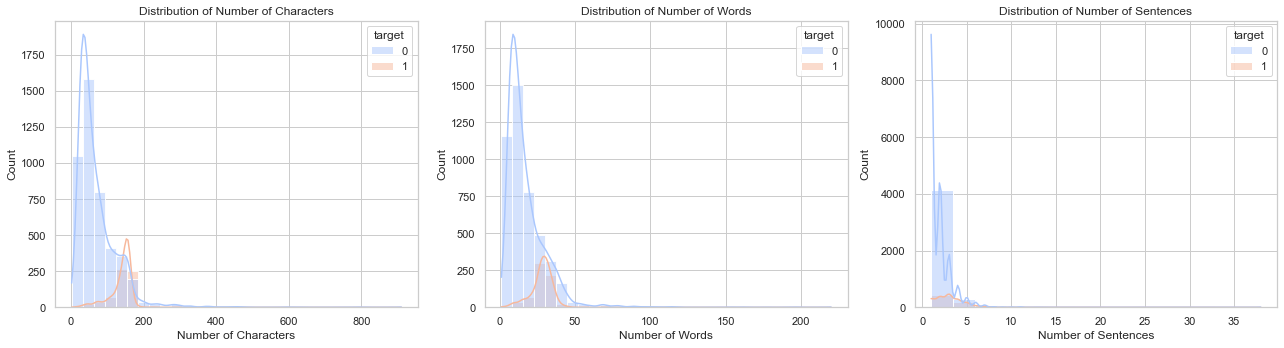

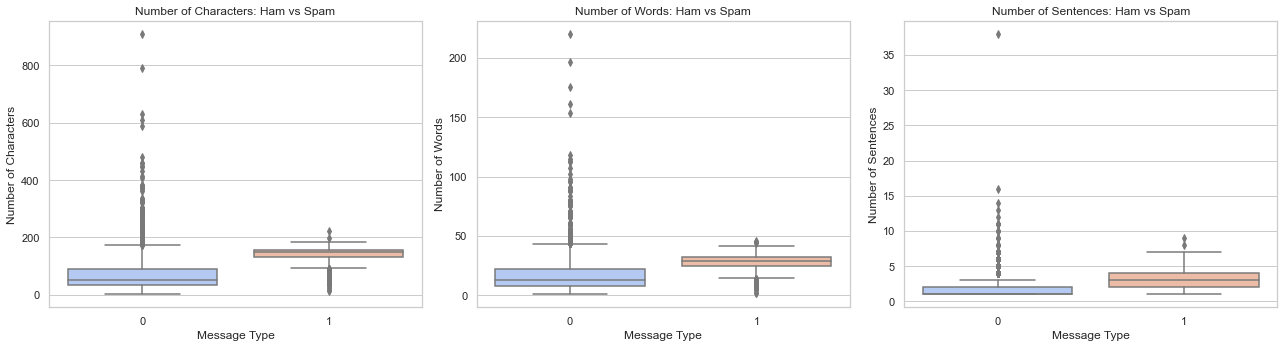

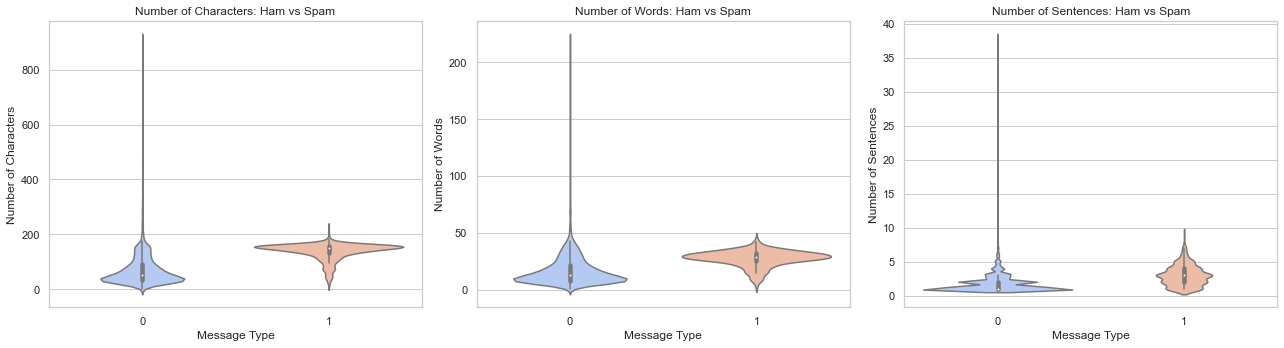

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set a style for the plots
sns.set(style="whitegrid")

# 1. Count plot to see the distribution of ham (0) and spam (1) messages
plt.figure(figsize=(8, 5))
sns.countplot(x='target', data=df, palette='coolwarm')
plt.title('Count of Ham (0) vs Spam (1) Messages')
plt.xlabel('Message Type')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=['Ham', 'Spam'])
plt.show()

# 2. Histograms to compare the distributions of num_characters, num_words, and num_sentences
plt.figure(figsize=(18, 5))

# Number of characters
plt.subplot(1, 3, 1)
sns.histplot(data=df, x='num_characters', hue='target', bins=30, kde=True, palette='coolwarm')
plt.title('Distribution of Number of Characters')
plt.xlabel('Number of Characters')

# Number of words
plt.subplot(1, 3, 2)
sns.histplot(data=df, x='num_words', hue='target', bins=30, kde=True, palette='coolwarm')
plt.title('Distribution of Number of Words')
plt.xlabel('Number of Words')

# Number of sentences
plt.subplot(1, 3, 3)
sns.histplot(data=df, x='num_sentences', hue='target', bins=15, kde=True, palette='coolwarm')
plt.title('Distribution of Number of Sentences')
plt.xlabel('Number of Sentences')

plt.tight_layout()
plt.show()

# 3. Box plots to visualize the spread of num_characters, num_words, and num_sentences
plt.figure(figsize=(18, 5))

# Number of characters
plt.subplot(1, 3, 1)
sns.boxplot(x='target', y='num_characters', data=df, palette='coolwarm')
plt.title('Number of Characters: Ham vs Spam')
plt.xlabel('Message Type')
plt.ylabel('Number of Characters')

# Number of words
plt.subplot(1, 3, 2)
sns.boxplot(x='target', y='num_words', data=df, palette='coolwarm')
plt.title('Number of Words: Ham vs Spam')
plt.xlabel('Message Type')
plt.ylabel('Number of Words')

# Number of sentences
plt.subplot(1, 3, 3)
sns.boxplot(x='target', y='num_sentences', data=df, palette='coolwarm')
plt.title('Number of Sentences: Ham vs Spam')
plt.xlabel('Message Type')
plt.ylabel('Number of Sentences')

plt.tight_layout()
plt.show()

# 4. Violin plot for distribution comparison
plt.figure(figsize=(18, 5))

# Number of characters
plt.subplot(1, 3, 1)
sns.violinplot(x='target', y='num_characters', data=df, palette='coolwarm')
plt.title('Number of Characters: Ham vs Spam')
plt.xlabel('Message Type')
plt.ylabel('Number of Characters')

# Number of words
plt.subplot(1, 3, 2)
sns.violinplot(x='target', y='num_words', data=df, palette='coolwarm')
plt.title('Number of Words: Ham vs Spam')
plt.xlabel('Message Type')
plt.ylabel('Number of Words')

# Number of sentences
plt.subplot(1, 3, 3)
sns.violinplot(x='target', y='num_sentences', data=df, palette='coolwarm')
plt.title('Number of Sentences: Ham vs Spam')
plt.xlabel('Message Type')
plt.ylabel('Number of Sentences')

plt.tight_layout()
plt.show()


Explanation of Plots:
1. Count Plot: This plot will show the total count of ham vs spam messages, helping you understand the class distribution.
2. Histograms: These plots show the distribution of num_characters, num_words, and num_sentences for both ham and spam. You can observe how the values differ between the two categories.
3. Box Plots: These plots visualize the median, interquartile range, and potential outliers for the three features in both ham and spam messages.
4. Violin Plots: These show the distribution and density of values, along with a hint of the spread in ham vs spam messages for each feature.


In [32]:
# !pip install seaborn


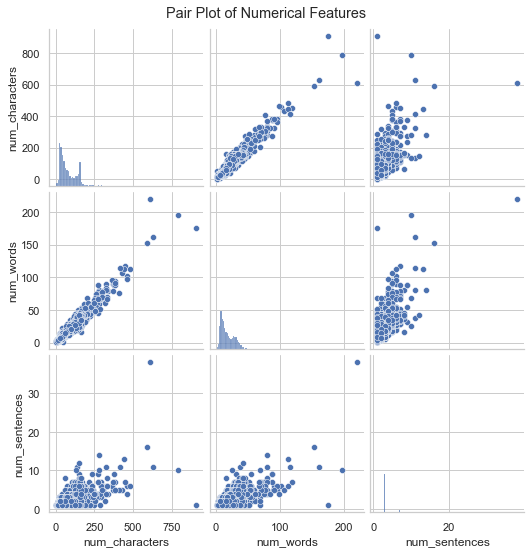

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select the numerical columns for the pair plot
numerical_columns = df[['num_characters', 'num_words', 'num_sentences']]

# Create a pair plot
sns.pairplot(numerical_columns)
plt.suptitle("Pair Plot of Numerical Features", y=1.02)
plt.show()


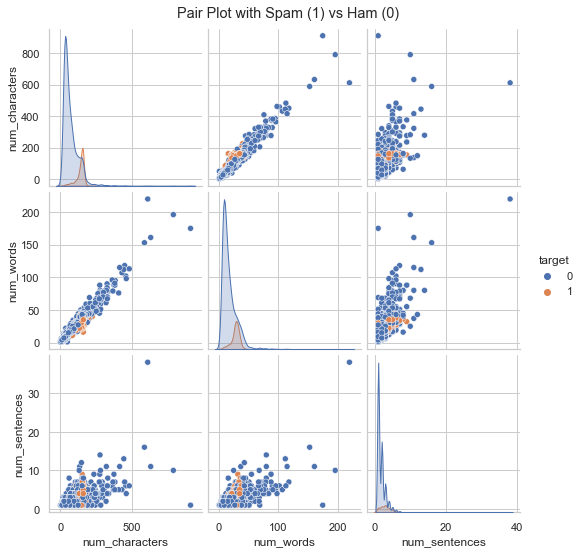

In [34]:
sns.pairplot(df[['num_characters', 'num_words', 'num_sentences', 'target']], hue='target')
plt.suptitle("Pair Plot with Spam (1) vs Ham (0)", y=1.02)
plt.show()


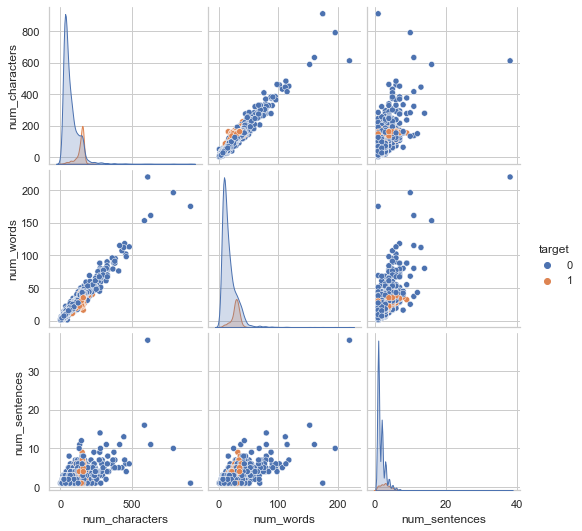

In [36]:
sns.pairplot(df,hue="target") 

from these plots I have found that there are some outlies in the data 

## Pearson Correlation Coefficient

The **Pearson correlation coefficient** (also known as the correlation coefficient) measures the linear correlation between two variables. It returns a value between -1 and 1, where:

- **1** indicates a perfect positive linear relationship.
- **-1** indicates a perfect negative linear relationship.
- **0** indicates no linear relationship.

To calculate the Pearson correlation coefficient for your dataset, you can use the `.corr()` function in Pandas.

```python
# Example of calculating Pearson correlation
correlation_matrix = df.corr(method='pearson')
print(correlation_matrix)


In [37]:
# Calculate Pearson correlation coefficient between all numerical columns
correlation_matrix = df[['num_characters', 'num_words', 'num_sentences']].corr(method='pearson')

print(correlation_matrix)


                num_characters  num_words  num_sentences
num_characters        1.000000   0.965784       0.626118
num_words             0.965784   1.000000       0.680882
num_sentences         0.626118   0.680882       1.000000


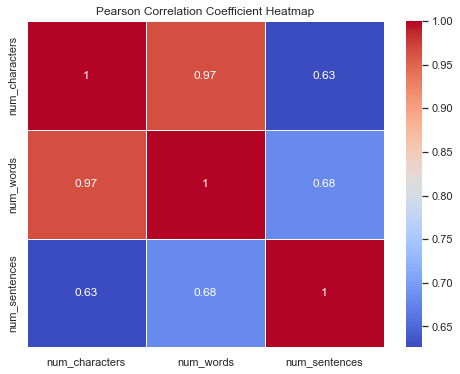

In [38]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate Pearson correlation matrix
correlation_matrix = df[['num_characters', 'num_words', 'num_sentences']].corr()

# Create a heatmap
plt.figure(figsize=(8,6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Pearson Correlation Coefficient Heatmap")
plt.show()


In [39]:
df.corr()

,target,num_characters,num_words,num_sentences
target,1.000000,0.384717,0.262969,0.267602
num_characters,0.384717,1.000000,0.965784,0.626118
num_words,0.262969,0.965784,1.000000,0.680882
num_sentences,0.267602,0.626118,0.680882,1.000000


<AxesSubplot:>

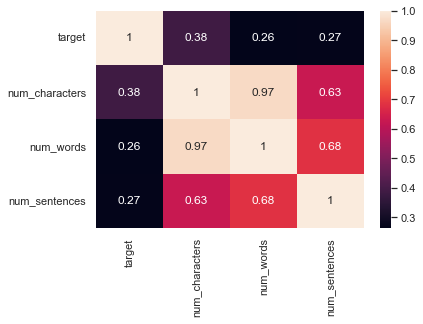

In [40]:
 sns.heatmap(df.corr(),annot=True)

## Key Observations:

### 1. Correlation Between `target` and Other Features:
- **`target` vs. `num_characters`:** 0.3847  
  - Moderate positive correlation. This indicates that spam messages (`target = 1`) tend to have more characters on average compared to ham (`target = 0`).
  
- **`target` vs. `num_words`:** 0.2629  
  - Weak positive correlation. Spam messages tend to have more words than ham messages, but the correlation is weaker compared to `num_characters`.
  
- **`target` vs. `num_sentences`:** 0.2676  
  - Weak positive correlation. Spam messages may have slightly more sentences than ham messages, but this correlation is also weak.

### 2. Correlation Between Features:
- **`num_characters` vs. `num_words`:** 0.9658  
  - Strong positive correlation. The number of characters and the number of words are closely related. More characters typically mean more words.
  
- **`num_words` vs. `num_sentences`:** 0.6809  
  - Moderate positive correlation. More words generally mean more sentences, but the relationship is not perfect.
  
- **`num_characters` vs. `num_sentences`:** 0.6261  
  - Moderate positive correlation. Messages with more characters tend to have more sentences, but not as strongly as the relationship between characters and words.

## Analysis and Feature Selection:

### Multicollinearity Concerns:
- The high correlation between `num_characters` and `num_words` (0.9658) suggests that these two features are almost redundant.
- Including both in the model might not add much additional information and could lead to multicollinearity issues.
- You could consider dropping one of these features, as they provide almost the same information. Alternatively, create a new feature like **average word length** to add new value.

### Usefulness of Features for Prediction:
- **`num_characters`** has the highest correlation with the target variable (0.3847), meaning it could be useful for identifying spam messages. However, the correlation is moderate, so it alone won't offer high predictive power.
- Both **`num_words`** and **`num_sentences`** have weak correlations with the target, meaning they may contribute to the model but are unlikely to be the strongest predictors.

## Next Steps:

### Feature Selection:
- You could keep `num_characters` and drop either `num_words` or `num_sentences` due to their high correlation. However, it’s good practice to test the model both with and without these features to see if removing them affects performance.

### Feature Engineering:
- Consider engineering new features, such as:
  - **Average word length:** `num_characters / num_words`
  - **Sentence complexity:** `num_words / num_sentences`

---

In summary, this correlation matrix highlights that `num_characters` is a strong predictor. There may be some redundancy between `num_characters` and `num_words`. Prioritize `num_characters` and consider feature engineering or testing the impact of removing redundant features.


## 3 Data processing

## 1. Data Preprocessing

In this section, we will perform various preprocessing steps to prepare the text data for modeling. Since the data is in textual form, natural language processing (NLP) techniques are required.

### Steps:

1. **Lowercasing:**
   - All the text will be converted to lowercase to ensure uniformity (e.g., "HELLO" and "hello" are treated the same).

2. **Tokenization:**
   - The text will be split into individual words (tokens) to make further processing easier.

3. **Removing Punctuation and Special Characters:**
   - All punctuation marks (e.g., commas, periods) and special characters will be removed as they do not contribute to the meaning of the text in most cases.

4. **Removing Stopwords:**
   - Stopwords like "the", "is", "and" will be removed as they do not provide significant meaning for our classification task.

5. **Stemming:**
   - Words will be reduced to their root form (e.g., "running" will become "run") using stemming techniques to reduce dimensionality.
   
### Preprocessing Implementation:
```python
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
import string

# Ensure NLTK resources are downloaded
nltk.download('punkt')
nltk.download('stopwords')

# Initialize stemmer and stopwords
stemmer = PorterStemmer()
stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    # Convert to lowercase
    text = text.lower()
    
    # Tokenize text
    words = word_tokenize(text)
    
    # Remove punctuation and special characters
    words = [word for word in words if word.isalnum()]
    
    # Remove stopwords
    words = [word for word in words if word not in stop_words]
    
    # Apply stemming
    words = [stemmer.stem(word) for word in words]
    
    return ' '.join(words)

# Apply preprocessing to the text column
df['cleaned_text'] = df['text'].apply(preprocess_text)


In [41]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
import string

# Ensure NLTK resources are downloaded
nltk.download('punkt')
nltk.download('stopwords')

ps = PorterStemmer()

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [42]:
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    y=[]
    for i in text:
        if i.isalnum():
            y.append(i)
    text=y[:]
    y.clear()
    
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
    text=y[:]
    y.clear()
    
    for i in text:
        y.append(ps.stem(i))
    return " " .join(y)
transform_text("Hi Ali something and someoneYOU  scientce ali beg@ me")

'hi ali someth someoney scientc ali beg'

In [43]:
transform_text(df['text'][10])

'gon na home soon want talk stuff anymor tonight k cri enough today'

In [44]:
df['transformed_text']=df['text'].apply(transform_text)

## Word Cloud

A word cloud is a visual representation where the size of each word signifies its frequency or importance. In this project, we will generate word clouds for both spam and ham messages to explore the most frequent words in each category.

**Why Word Cloud?**
1. **Exploratory Data Analysis:** Helps in visualizing the frequency of words, which might provide insights into patterns.
2. **Feature Engineering:** Frequently occurring words in spam or ham could be potential features for classification.


In [121]:
# from wordcloud import WordCloud
# import matplotlib.pyplot as plt

# # Separate spam and ham messages
# spam_text = ' '.join(df[df['target'] == 1]['text'])
# ham_text = ' '.join(df[df['target'] == 0]['text'])

# # Create word clouds
# spam_wordcloud = WordCloud(width=800, height=400, min_font_size=10, background_color='white').generate(spam_text)
# ham_wordcloud = WordCloud(width=800, height=400, min_font_size=10, background_color='white').generate(ham_text)

# # Plot spam word cloud
# plt.figure(figsize=(10, 5))
# plt.title('Word Cloud for Spam Messages')
# plt.imshow(spam_wordcloud, interpolation='bilinear')
# plt.axis('off')
# plt.show()

# # Plot ham word cloud
# plt.figure(figsize=(10, 5))
# plt.title('Word Cloud for Ham Messages')
# plt.imshow(ham_wordcloud, interpolation='bilinear')
# plt.axis('off')
# plt.show()


In [59]:
spam_corpus=[]
for msg in df[df['target']==1]['transformed_text'].tolist():
    for words in msg.split():
        spam_corpus.append(words)

from collections import Counter
pd.DataFrame(Counter(spam_corpus).most_common(30))

len(spam_corpus)

9939

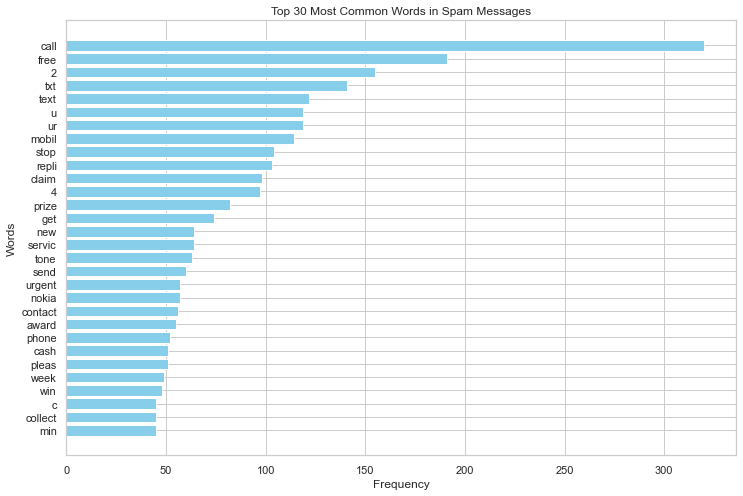

In [60]:
# import matplotlib.pyplot as plt
# import pandas as pd
# from collections import Counter

# Assuming spam_corpus is a list of words
spam_corpus = ' '.join(df[df['target'] == 1]['transformed_text']).split()

# Count word frequencies
word_counts = Counter(spam_corpus)

# Create a DataFrame of the most common words
word_counts_df = pd.DataFrame(word_counts.most_common(30), columns=['Word', 'Count'])

# Plot the most common words
plt.figure(figsize=(12, 8))
plt.barh(word_counts_df['Word'], word_counts_df['Count'], color='skyblue')
plt.xlabel('Frequency')
plt.ylabel('Words')
plt.title('Top 30 Most Common Words in Spam Messages')
plt.gca().invert_yaxis()  # To display the most common words at the top
plt.show()


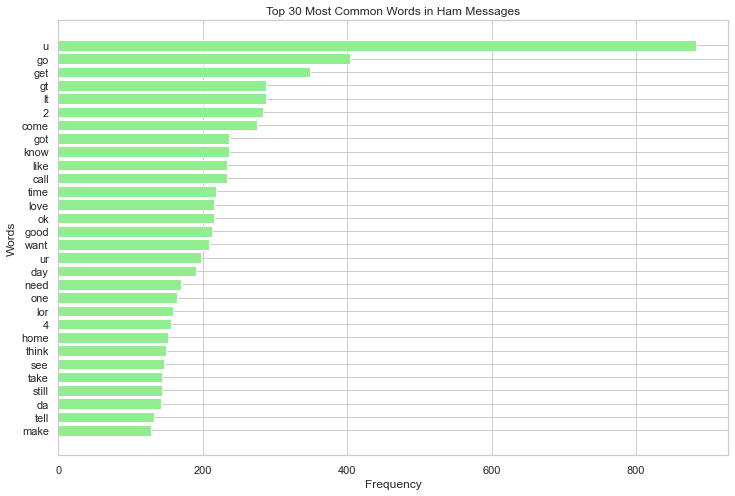

In [61]:
# import matplotlib.pyplot as plt
# import pandas as pd
# from collections import Counter

# Create a corpus of words for ham messages
ham_corpus = ' '.join(df[df['target'] == 0]['transformed_text']).split()

# Count word frequencies
ham_word_counts = Counter(ham_corpus)

# Create a DataFrame of the most common words
ham_word_counts_df = pd.DataFrame(ham_word_counts.most_common(30), columns=['Word', 'Count'])

# Plot the most common words
plt.figure(figsize=(12, 8))
plt.barh(ham_word_counts_df['Word'], ham_word_counts_df['Count'], color='lightgreen')
plt.xlabel('Frequency')
plt.ylabel('Words')
plt.title('Top 30 Most Common Words in Ham Messages')
plt.gca().invert_yaxis()  # To display the most common words at the top
plt.show()


# 4. Model Building and Evaluation

## Overview
Now i am going to build a spam/ham message classification model. We'll start with the Naive Bayes algorithm and then compare its performance with other algorithms to find the best-performing model.

## 1. Naive Bayes Classification

### a. Introduction
Naive Bayes is a probabilistic classifier based on Bayes' theorem with strong (naive) independence assumptions. It is effective for text classification tasks and will serve as our baseline model.

### b. Steps
1. **Prepare Data:**
   - Split the dataset into training and testing sets.
   - Convert text data into numerical features using techniques such as TF-IDF or Count Vectorization.

2. **Train Model:**
   - Use the training data to fit the Naive Bayes model.

3. **Evaluate Model:**
   - Predict on the test set.
   - Measure performance using metrics like accuracy, precision, recall, F1-score, and confusion matrix.

### c. Code
```python
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix

# Prepare data
X = df['transformed_text']
y = df['target']

# Convert text data to numerical features
vectorizer = TfidfVectorizer()
X_vectorized = vectorizer.fit_transform(X)

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X_vectorized, y, test_size=0.3, random_state=42)

# Train the Naive Bayes model
nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)

# Predict on the test set
y_pred = nb_model.predict(X_test)

# Evaluate the model
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


In [64]:
# vectorisation of the data using bag of words
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()

X= cv.fit_transform(df['transformed_text']).toarray()

In [65]:
X.shape

(5169, 6708)

In [66]:
y = df['target'].values
y

array([0, 0, 1, ..., 0, 0, 0])

In [88]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score

from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, train_size=0.8)

gnb= GaussianNB()
mnb= MultinomialNB()
bnb= BernoulliNB()

In [119]:
# gnb.fit(X_train, y_train)
# y_pred1 = gnb.predict(X_test)

# print(accuracy_score(y_test, y_pred1))
# print(confusion_matrix(y_test,y_pred1))
# print(precision_score(y_test,y_pred1))


In [117]:
# mnb.fit(X_train, y_train)
# y_pred2 = mnb.predict(X_test)

# print(accuracy_score(y_test, y_pred2))
# print(confusion_matrix(y_test,y_pred2))
# print(precision_score(y_test,y_pred2))

In [118]:
# bnb.fit(X_train, y_train)
# y_pred3 = bnb.predict(X_test)

# print(accuracy_score(y_test, y_pred3))
# print(confusion_matrix(y_test,y_pred3))
# print(precision_score(y_test,y_pred3))

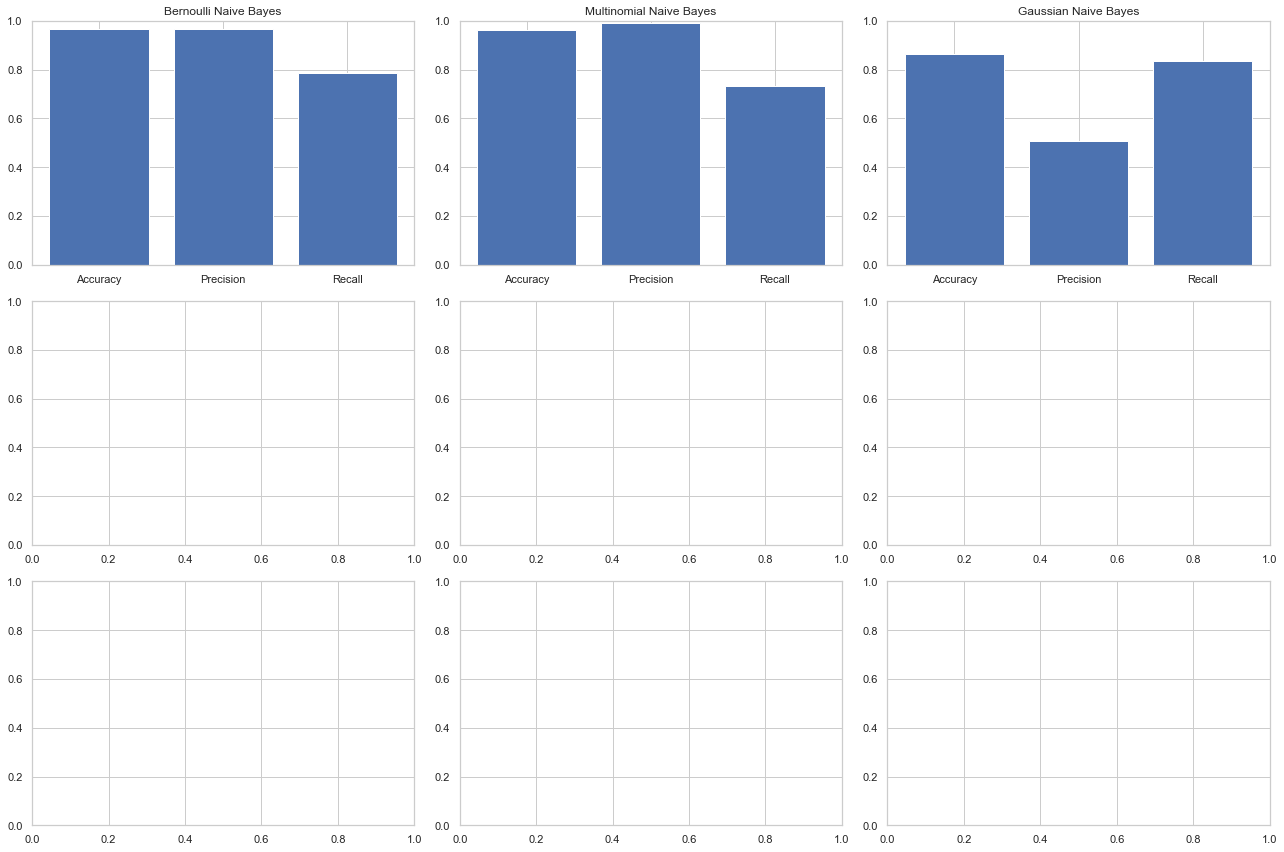

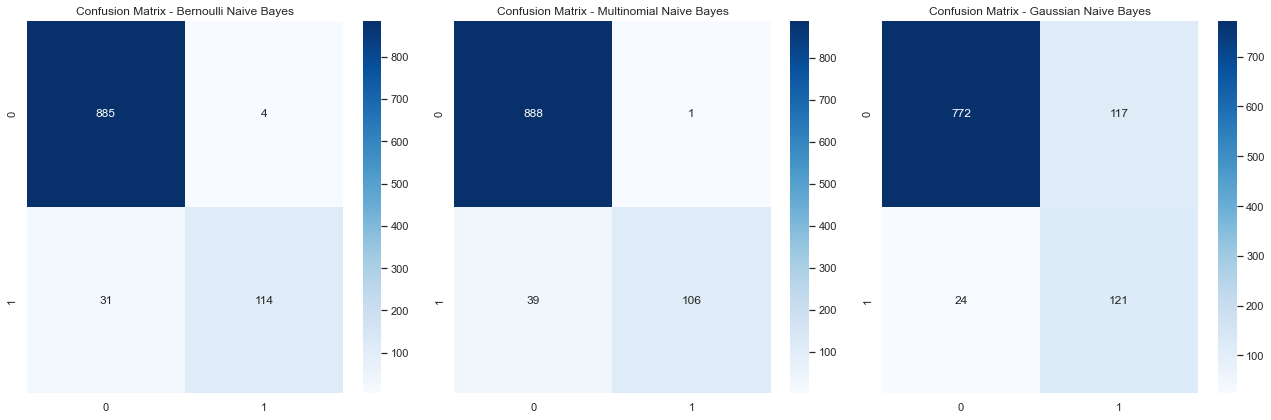

In [92]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import BernoulliNB, MultinomialNB, GaussianNB
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score
import numpy as np

# Prepare data
X = df['transformed_text']
y = df['target']

# Convert text data to numerical features
vectorizer = TfidfVectorizer()
X_vectorized = vectorizer.fit_transform(X)

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X_vectorized, y, test_size=0.2, random_state=42)

# Initialize models
models = {
    'Bernoulli Naive Bayes': BernoulliNB(),
    'Multinomial Naive Bayes': MultinomialNB(),
    'Gaussian Naive Bayes': GaussianNB()
}

# Store metrics
results = {}

for name, model in models.items():
    # Train the model
    if name == 'Gaussian Naive Bayes':
        # GaussianNB does not support sparse matrices, so convert X_train and X_test to dense arrays
        X_train_dense = X_train.toarray()
        X_test_dense = X_test.toarray()
        model.fit(X_train_dense, y_train)
        y_pred = model.predict(X_test_dense)
    else:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

    # Calculate metrics
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)

    results[name] = {
        'Accuracy': acc,
        'Precision': prec,
        'Recall': rec,
        'Confusion Matrix': conf_matrix
    }

# Plot results
fig, axes = plt.subplots(3, 3, figsize=(18, 12))

# Plot accuracy, precision, and recall
for i, (name, metrics) in enumerate(results.items()):
    row, col = divmod(i, 3)
    axes[row, col].bar(['Accuracy', 'Precision', 'Recall'], 
                       [metrics['Accuracy'], metrics['Precision'], metrics['Recall']])
    axes[row, col].set_title(name)
    axes[row, col].set_ylim(0, 1)

plt.tight_layout()
plt.show()

# Plot confusion matrices
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

for i, (name, metrics) in enumerate(results.items()):
    sns.heatmap(metrics['Confusion Matrix'], annot=True, fmt='d', cmap='Blues', ax=axes[i])
    axes[i].set_title(f'Confusion Matrix - {name}')

plt.tight_layout()
plt.show()


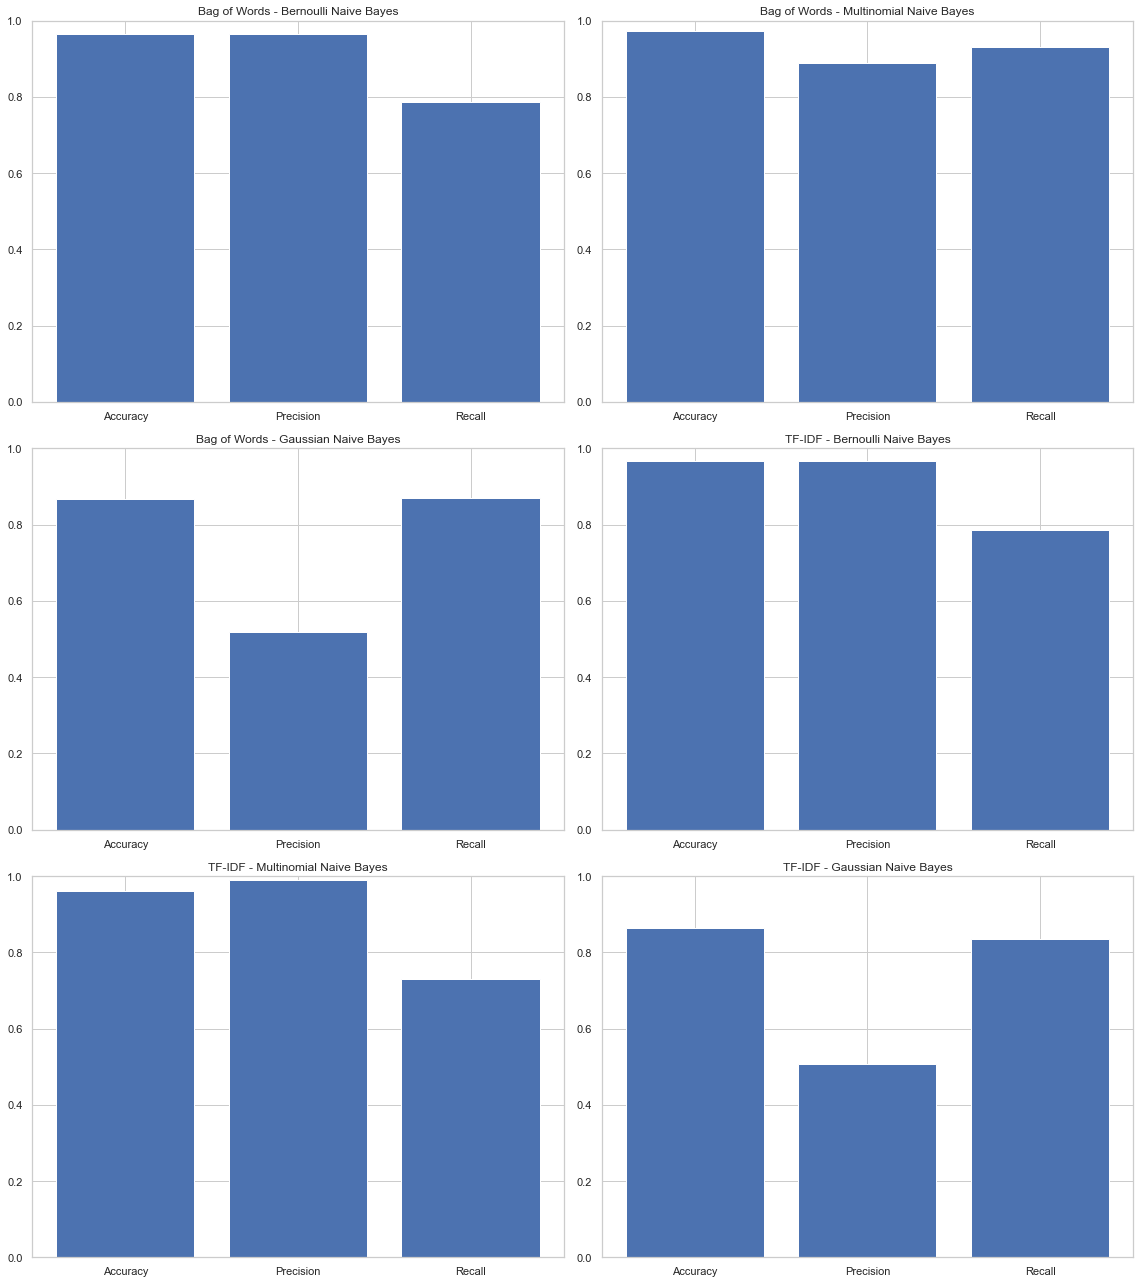

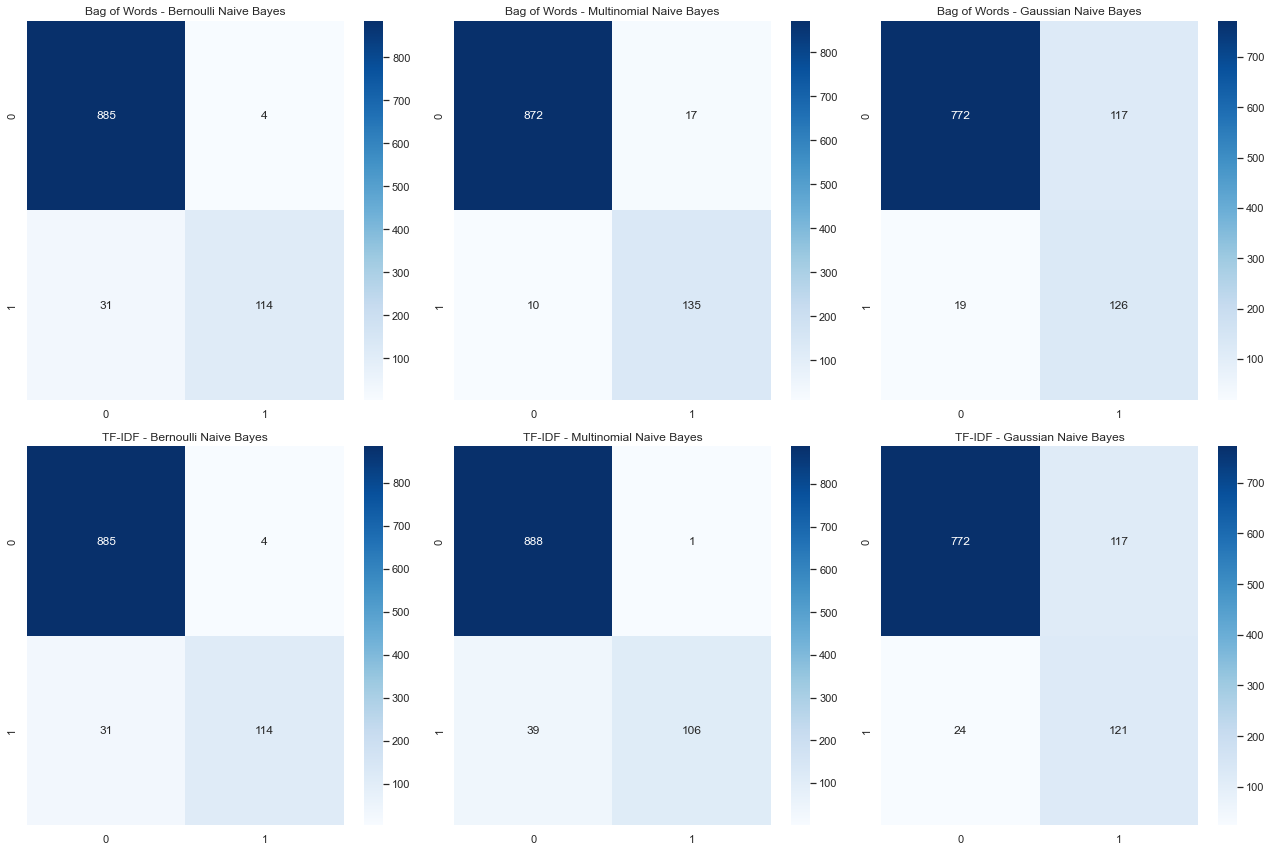

In [93]:
# import matplotlib.pyplot as plt
# import seaborn as sns
# from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
# from sklearn.model_selection import train_test_split
# from sklearn.naive_bayes import BernoulliNB, MultinomialNB, GaussianNB
# from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score
# import numpy as np

# Prepare data
X = df['transformed_text']
y = df['target']

# Feature Extraction
vectorizers = {
    'Bag of Words': CountVectorizer(),
    'TF-IDF': TfidfVectorizer()
}

# Initialize models
models = {
    'Bernoulli Naive Bayes': BernoulliNB(),
    'Multinomial Naive Bayes': MultinomialNB(),
    'Gaussian Naive Bayes': GaussianNB()
}

# Store results
results = {vectorizer_name: {model_name: {} for model_name in models.keys()} for vectorizer_name in vectorizers.keys()}

for vectorizer_name, vectorizer in vectorizers.items():
    X_vectorized = vectorizer.fit_transform(X)
    X_train, X_test, y_train, y_test = train_test_split(X_vectorized, y, test_size=0.2, random_state=42)

    for model_name, model in models.items():
        if model_name == 'Gaussian Naive Bayes':
            # GaussianNB does not support sparse matrices, so convert X_train and X_test to dense arrays
            X_train_dense = X_train.toarray()
            X_test_dense = X_test.toarray()
            model.fit(X_train_dense, y_train)
            y_pred = model.predict(X_test_dense)
        else:
            model.fit(X_train, y_train)
            y_pred = model.predict(X_test)

        # Calculate metrics
        acc = accuracy_score(y_test, y_pred)
        prec = precision_score(y_test, y_pred)
        rec = recall_score(y_test, y_pred)
        conf_matrix = confusion_matrix(y_test, y_pred)

        results[vectorizer_name][model_name] = {
            'Accuracy': acc,
            'Precision': prec,
            'Recall': rec,
            'Confusion Matrix': conf_matrix
        }

# Plot results
fig, axes = plt.subplots(3, 2, figsize=(16, 18))
axes = axes.flatten()

for i, (vectorizer_name, metrics_dict) in enumerate(results.items()):
    for j, (model_name, metrics) in enumerate(metrics_dict.items()):
        # Plot accuracy, precision, and recall
        axes[i * 3 + j].bar(['Accuracy', 'Precision', 'Recall'], 
                            [metrics['Accuracy'], metrics['Precision'], metrics['Recall']])
        axes[i * 3 + j].set_title(f'{vectorizer_name} - {model_name}')
        axes[i * 3 + j].set_ylim(0, 1)

plt.tight_layout()
plt.show()

# Plot confusion matrices
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
axes = axes.flatten()

for i, (vectorizer_name, metrics_dict) in enumerate(results.items()):
    for j, (model_name, metrics) in enumerate(metrics_dict.items()):
        sns.heatmap(metrics['Confusion Matrix'], annot=True, fmt='d', cmap='Blues', ax=axes[i * 3 + j])
        axes[i * 3 + j].set_title(f'{vectorizer_name} - {model_name}')

plt.tight_layout()
plt.show()


In [94]:
# now i am going with tfidf -->MNB

In [95]:
# now traing and evaluting model on diff algorithms

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline

# Define TF-IDF Vectorizer
tfidf_vectorizer = TfidfVectorizer(stop_words='english')

# Transform the text data
X_tfidf = tfidf_vectorizer.fit_transform(df['transformed_text'])
y = df['target']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=42)


Model: Logistic Regression
Classification Report:
              precision    recall  f1-score   support

           0       0.94      1.00      0.97       889
           1       0.99      0.64      0.78       145

    accuracy                           0.95      1034
   macro avg       0.97      0.82      0.87      1034
weighted avg       0.95      0.95      0.94      1034



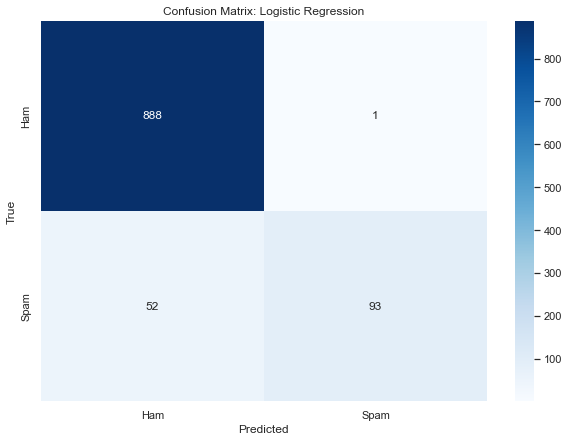

Model: SVC
Classification Report:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       889
           1       1.00      0.76      0.86       145

    accuracy                           0.97      1034
   macro avg       0.98      0.88      0.92      1034
weighted avg       0.97      0.97      0.96      1034



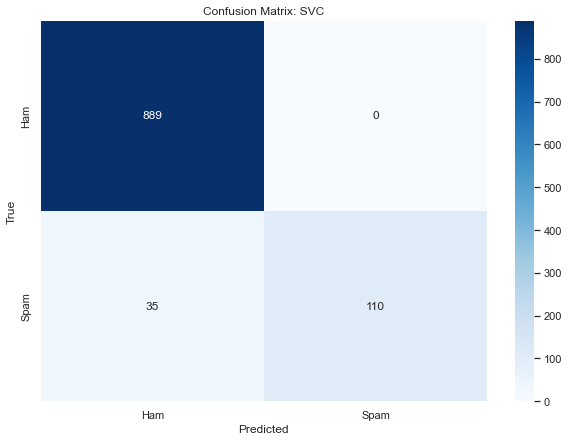

Model: Multinomial Naive Bayes
Classification Report:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       889
           1       0.99      0.73      0.84       145

    accuracy                           0.96      1034
   macro avg       0.97      0.86      0.91      1034
weighted avg       0.96      0.96      0.96      1034



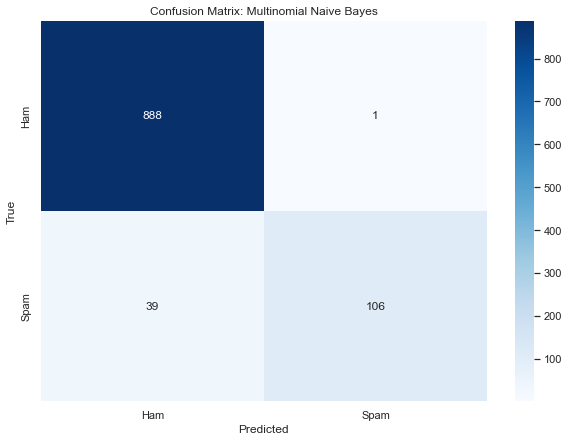

Model: Decision Tree
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.97      0.97       889
           1       0.82      0.86      0.84       145

    accuracy                           0.95      1034
   macro avg       0.90      0.91      0.91      1034
weighted avg       0.95      0.95      0.95      1034



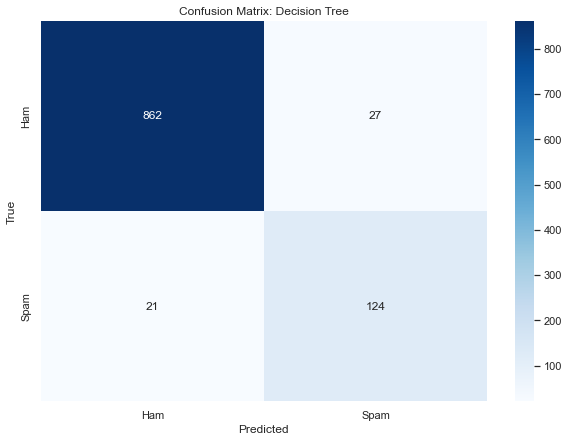

Model: KNN
Classification Report:
              precision    recall  f1-score   support

           0       0.89      1.00      0.94       889
           1       1.00      0.25      0.40       145

    accuracy                           0.89      1034
   macro avg       0.95      0.62      0.67      1034
weighted avg       0.91      0.89      0.87      1034



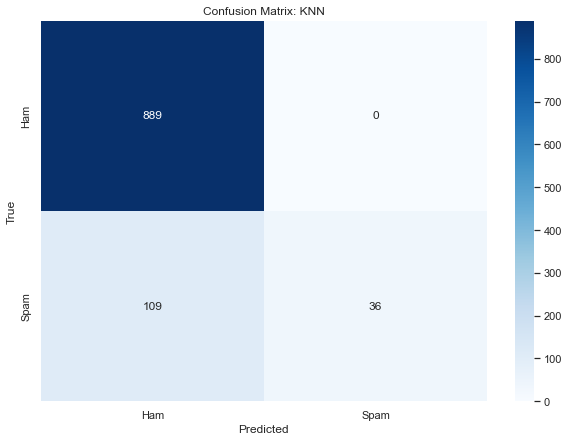

Model: Random Forest
Classification Report:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       889
           1       0.99      0.74      0.85       145

    accuracy                           0.96      1034
   macro avg       0.98      0.87      0.91      1034
weighted avg       0.96      0.96      0.96      1034



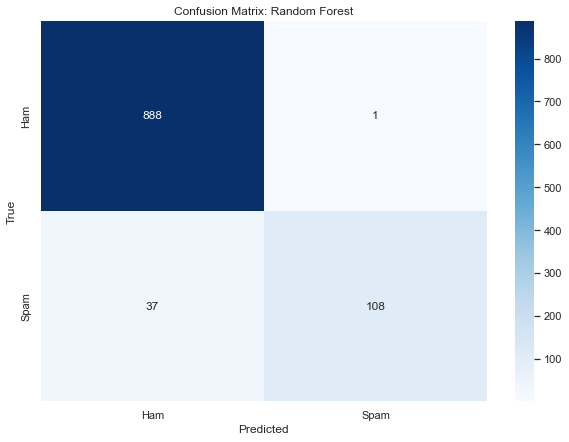

Model: AdaBoost
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.98      0.97       889
           1       0.89      0.79      0.84       145

    accuracy                           0.96      1034
   macro avg       0.93      0.89      0.91      1034
weighted avg       0.96      0.96      0.96      1034



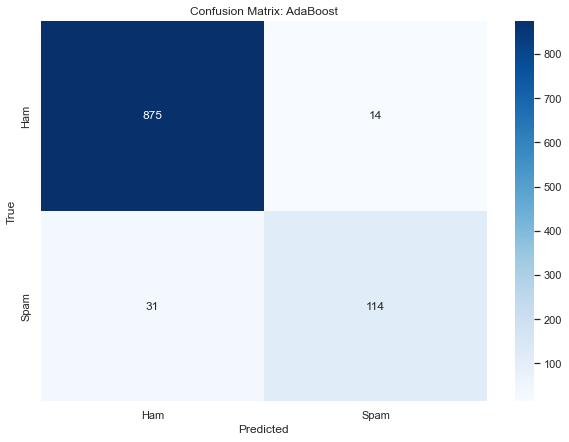

Model: Bagging
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       889
           1       0.90      0.81      0.85       145

    accuracy                           0.96      1034
   macro avg       0.93      0.90      0.91      1034
weighted avg       0.96      0.96      0.96      1034



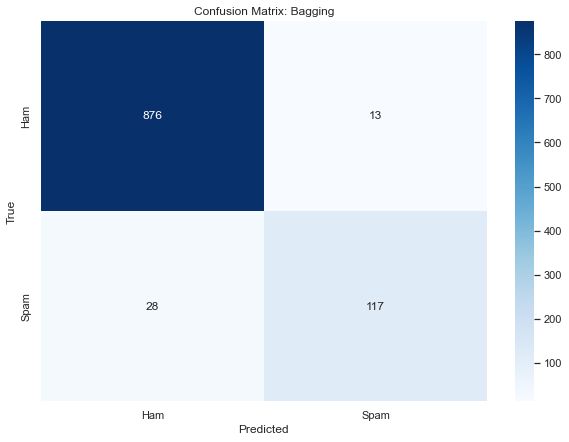

Model: Extra Trees
Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.98       889
           1       0.98      0.81      0.89       145

    accuracy                           0.97      1034
   macro avg       0.98      0.91      0.94      1034
weighted avg       0.97      0.97      0.97      1034



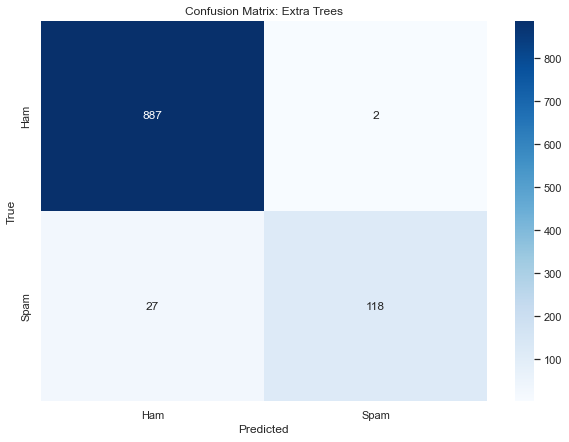

Model: Gradient Boosting
Classification Report:
              precision    recall  f1-score   support

           0       0.95      1.00      0.97       889
           1       0.97      0.70      0.81       145

    accuracy                           0.95      1034
   macro avg       0.96      0.85      0.89      1034
weighted avg       0.96      0.95      0.95      1034



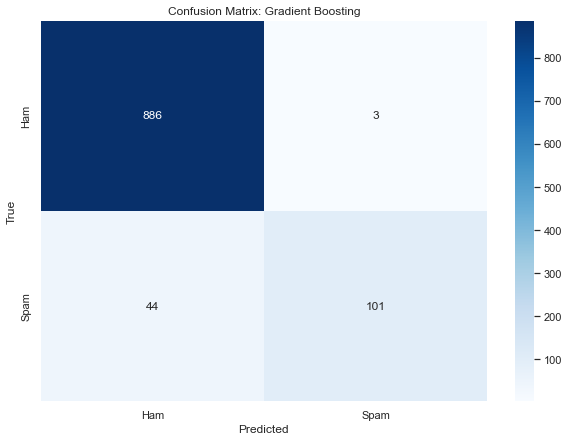

Model: XGBoost
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       889
           1       0.92      0.83      0.87       145

    accuracy                           0.97      1034
   macro avg       0.95      0.91      0.93      1034
weighted avg       0.97      0.97      0.97      1034



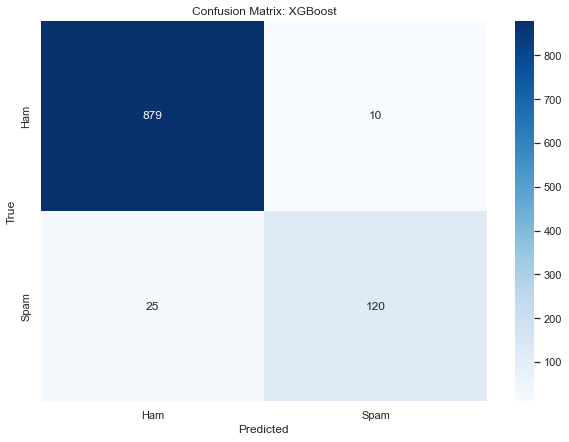

<Figure size 1008x576 with 0 Axes>

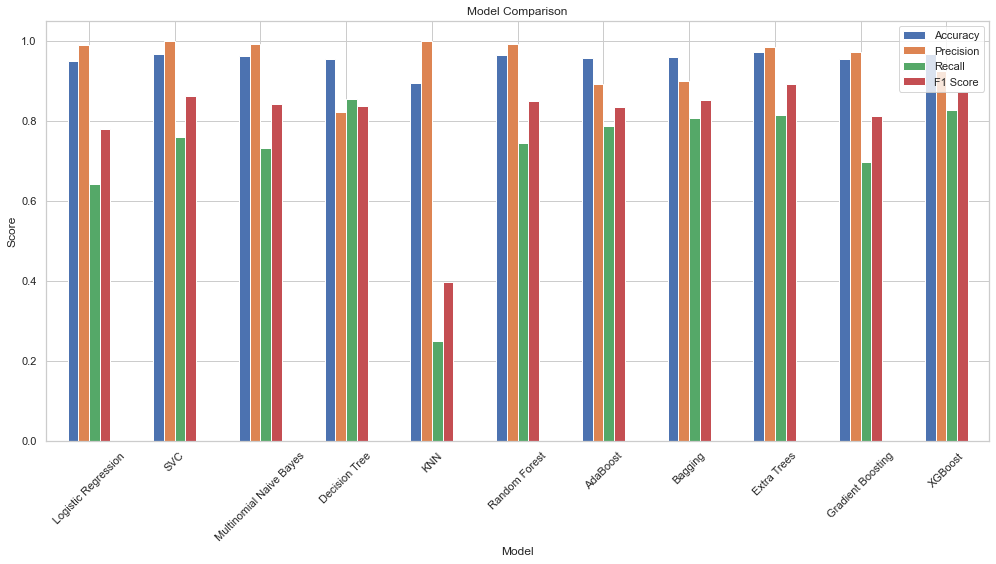

In [98]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, BaggingClassifier, ExtraTreesClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Define models
models = {
    'Logistic Regression': LogisticRegression(),
    'SVC': SVC(),
    'Multinomial Naive Bayes': MultinomialNB(),
    'Decision Tree': DecisionTreeClassifier(),
    'KNN': KNeighborsClassifier(),
    'Random Forest': RandomForestClassifier(),
    'AdaBoost': AdaBoostClassifier(),
    'Bagging': BaggingClassifier(),
    'Extra Trees': ExtraTreesClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'XGBoost': XGBClassifier()
}

# Initialize metrics storage
results = {
    'Model': [],
    'Accuracy': [],
    'Precision': [],
    'Recall': [],
    'F1 Score': []
}

# Train and evaluate each model
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    
    results['Model'].append(model_name)
    results['Accuracy'].append(accuracy)
    results['Precision'].append(precision)
    results['Recall'].append(recall)
    results['F1 Score'].append(f1)
    
    # Print classification report and confusion matrix
    print(f"Model: {model_name}")
    print("Classification Report:")
    print(classification_report(y_test, y_pred))
    
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(10, 7))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Ham', 'Spam'], yticklabels=['Ham', 'Spam'])
    plt.title(f'Confusion Matrix: {model_name}')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

# Convert results to DataFrame for better plotting
import pandas as pd
results_df = pd.DataFrame(results)

# Plot comparison
plt.figure(figsize=(14, 8))
results_df.set_index('Model').plot(kind='bar', figsize=(14, 8))
plt.title('Model Comparison')
plt.ylabel('Score')
plt.xlabel('Model')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Model: Logistic Regression
Classification Report:
              precision    recall  f1-score   support

           0       0.94      1.00      0.97       889
           1       0.99      0.64      0.78       145

    accuracy                           0.95      1034
   macro avg       0.97      0.82      0.87      1034
weighted avg       0.95      0.95      0.94      1034



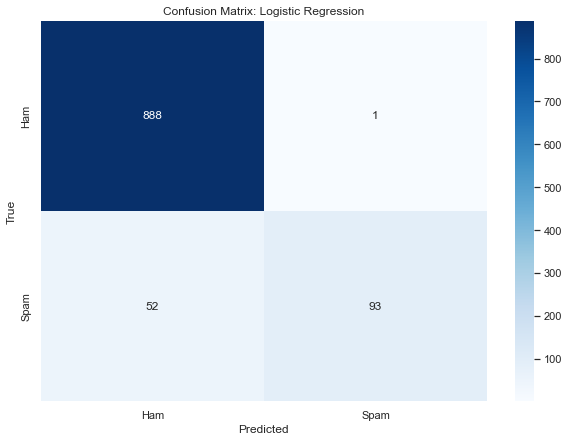

Model: SVC
Classification Report:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       889
           1       1.00      0.76      0.86       145

    accuracy                           0.97      1034
   macro avg       0.98      0.88      0.92      1034
weighted avg       0.97      0.97      0.96      1034



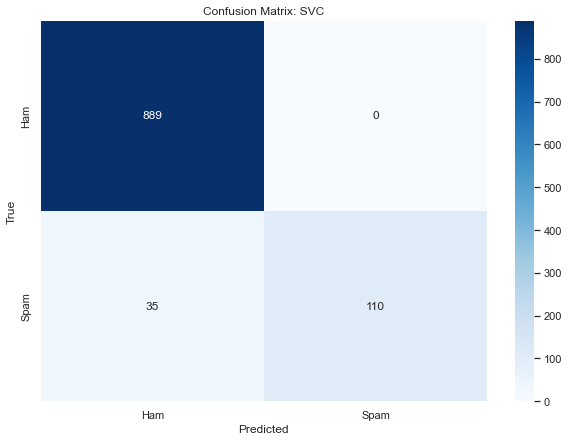

Model: Multinomial Naive Bayes
Classification Report:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       889
           1       0.99      0.73      0.84       145

    accuracy                           0.96      1034
   macro avg       0.97      0.86      0.91      1034
weighted avg       0.96      0.96      0.96      1034



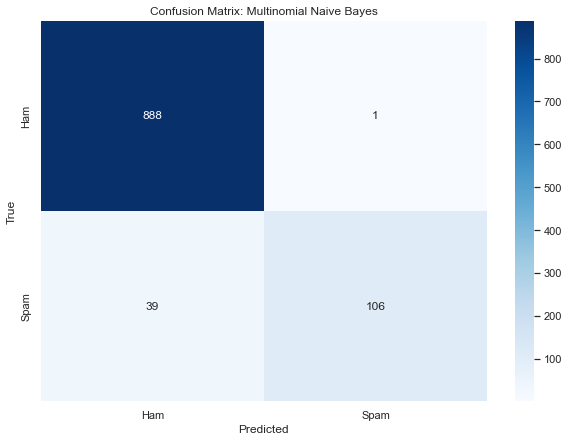

Model: Decision Tree
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.97      0.97       889
           1       0.84      0.84      0.84       145

    accuracy                           0.96      1034
   macro avg       0.91      0.91      0.91      1034
weighted avg       0.96      0.96      0.96      1034



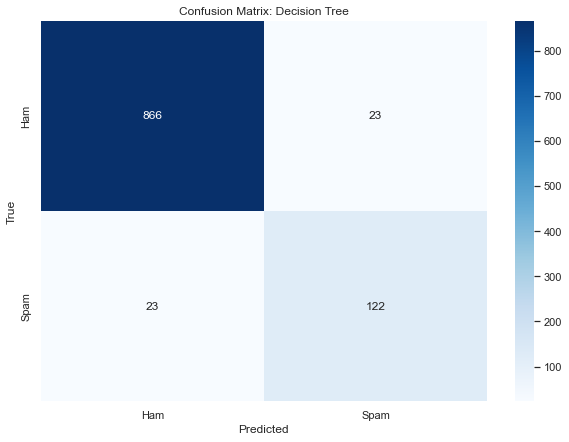

Model: KNN
Classification Report:
              precision    recall  f1-score   support

           0       0.89      1.00      0.94       889
           1       1.00      0.25      0.40       145

    accuracy                           0.89      1034
   macro avg       0.95      0.62      0.67      1034
weighted avg       0.91      0.89      0.87      1034



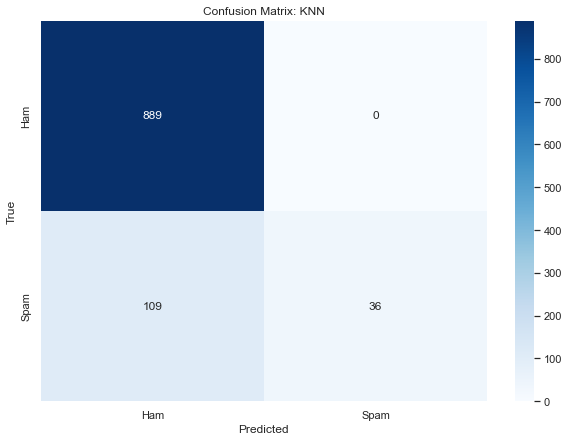

Model: Random Forest
Classification Report:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       889
           1       0.98      0.77      0.86       145

    accuracy                           0.97      1034
   macro avg       0.97      0.88      0.92      1034
weighted avg       0.97      0.97      0.96      1034



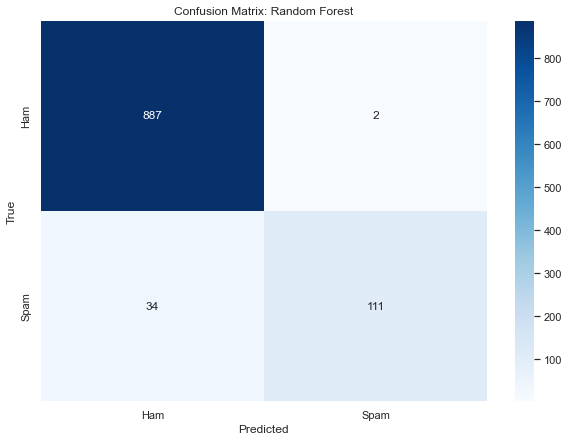

Model: AdaBoost
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.98      0.97       889
           1       0.89      0.79      0.84       145

    accuracy                           0.96      1034
   macro avg       0.93      0.89      0.91      1034
weighted avg       0.96      0.96      0.96      1034



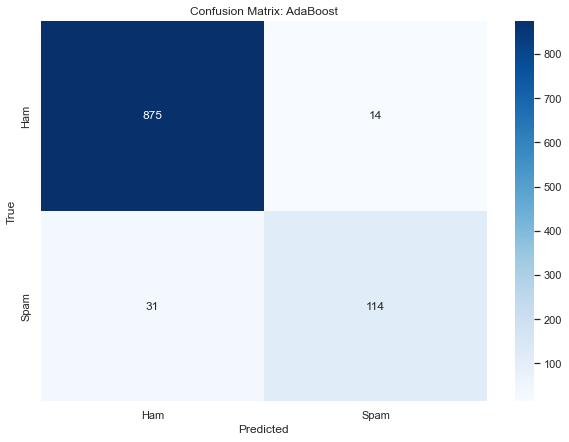

Model: Bagging
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.98      0.98       889
           1       0.86      0.83      0.85       145

    accuracy                           0.96      1034
   macro avg       0.92      0.91      0.91      1034
weighted avg       0.96      0.96      0.96      1034



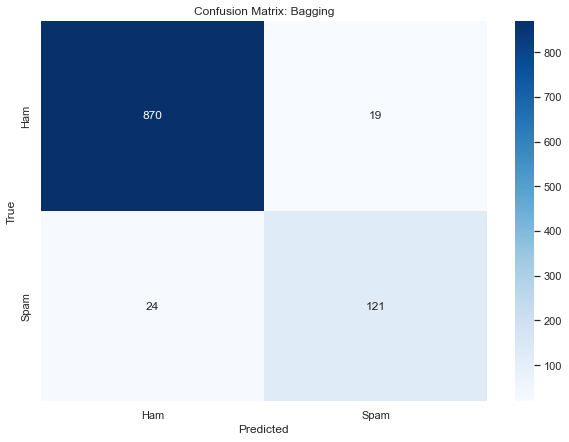

Model: Extra Trees
Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.99       889
           1       0.99      0.83      0.91       145

    accuracy                           0.98      1034
   macro avg       0.98      0.92      0.95      1034
weighted avg       0.98      0.98      0.97      1034



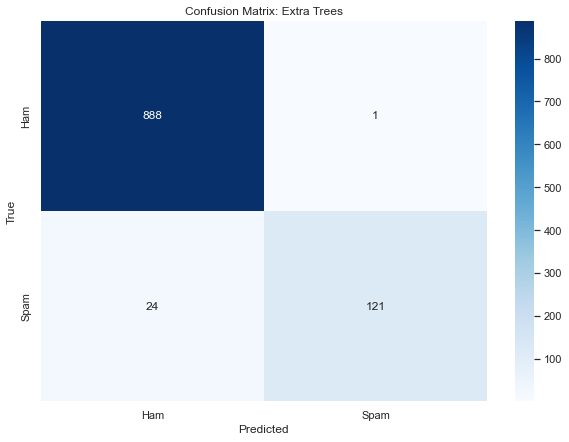

Model: Gradient Boosting
Classification Report:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       889
           1       0.97      0.74      0.84       145

    accuracy                           0.96      1034
   macro avg       0.97      0.87      0.91      1034
weighted avg       0.96      0.96      0.96      1034



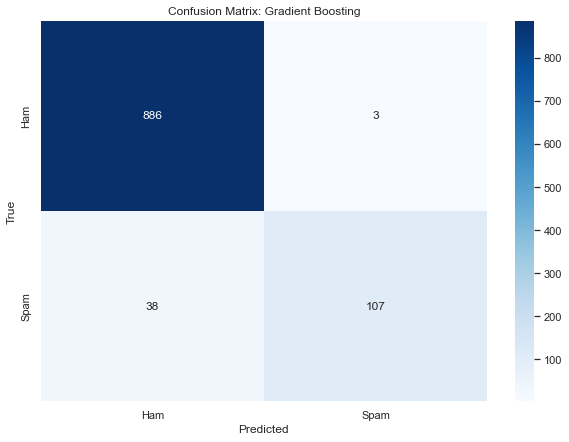

Model: XGBoost
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       889
           1       0.92      0.83      0.87       145

    accuracy                           0.97      1034
   macro avg       0.95      0.91      0.93      1034
weighted avg       0.97      0.97      0.97      1034



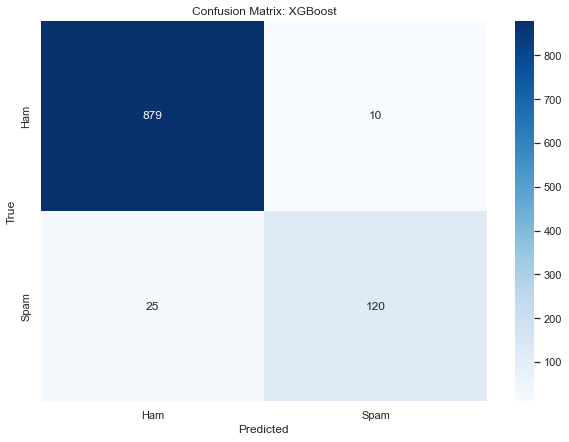

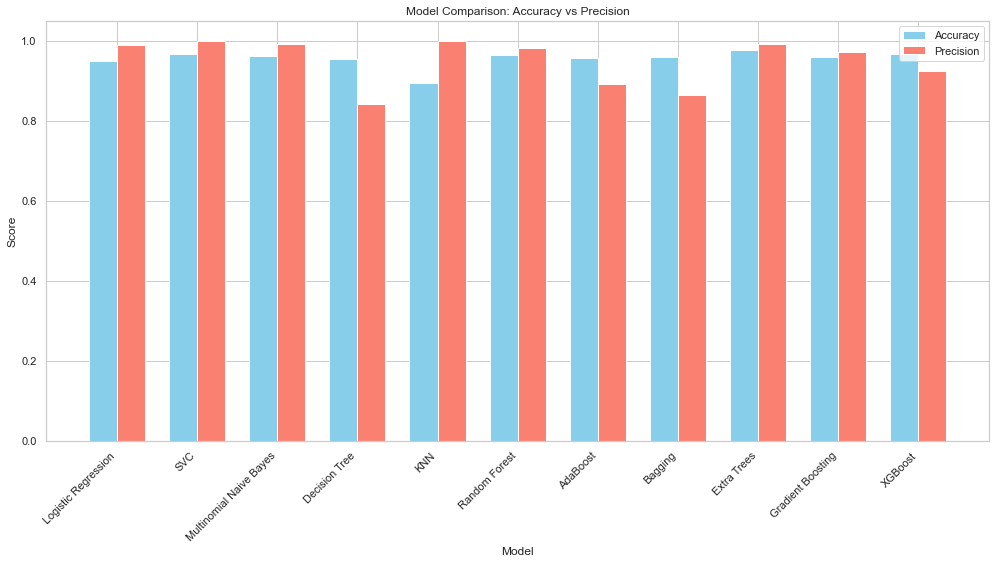

In [101]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, BaggingClassifier, ExtraTreesClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Define models
models = {
    'Logistic Regression': LogisticRegression(),
    'SVC': SVC(),
    'Multinomial Naive Bayes': MultinomialNB(),
    'Decision Tree': DecisionTreeClassifier(),
    'KNN': KNeighborsClassifier(),
    'Random Forest': RandomForestClassifier(),
    'AdaBoost': AdaBoostClassifier(),
    'Bagging': BaggingClassifier(),
    'Extra Trees': ExtraTreesClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'XGBoost': XGBClassifier()
}

# Initialize metrics storage
results = {
    'Model': [],
    'Accuracy': [],
    'Precision': [],
    'Recall': [],
    'F1 Score': []
}

# Train and evaluate each model
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    
    results['Model'].append(model_name)
    results['Accuracy'].append(accuracy)
    results['Precision'].append(precision)
    results['Recall'].append(recall)
    results['F1 Score'].append(f1)
    
    # Print classification report and confusion matrix
    print(f"Model: {model_name}")
    print("Classification Report:")
    print(classification_report(y_test, y_pred))
    
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(10, 7))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Ham', 'Spam'], yticklabels=['Ham', 'Spam'])
    plt.title(f'Confusion Matrix: {model_name}')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

# Convert results to DataFrame for better plotting
results_df = pd.DataFrame(results)

# Plot comparison of accuracy and precision for each model
fig, ax = plt.subplots(figsize=(14, 8))

# Set the bar width and positions
bar_width = 0.35
index = range(len(results_df['Model']))

# Plot Accuracy
bar1 = ax.bar(index, results_df['Accuracy'], bar_width, label='Accuracy', color='skyblue')

# Plot Precision
bar2 = ax.bar([i + bar_width for i in index], results_df['Precision'], bar_width, label='Precision', color='salmon')

# Add labels and title
ax.set_xlabel('Model')
ax.set_ylabel('Score')
ax.set_title('Model Comparison: Accuracy vs Precision')
ax.set_xticks([i + bar_width / 2 for i in index])
ax.set_xticklabels(results_df['Model'], rotation=45, ha='right')
ax.legend()

plt.tight_layout()
plt.show()


Model: Logistic Regression
Classification Report:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       889
           1       0.99      0.72      0.83       145

    accuracy                           0.96      1034
   macro avg       0.97      0.86      0.90      1034
weighted avg       0.96      0.96      0.96      1034



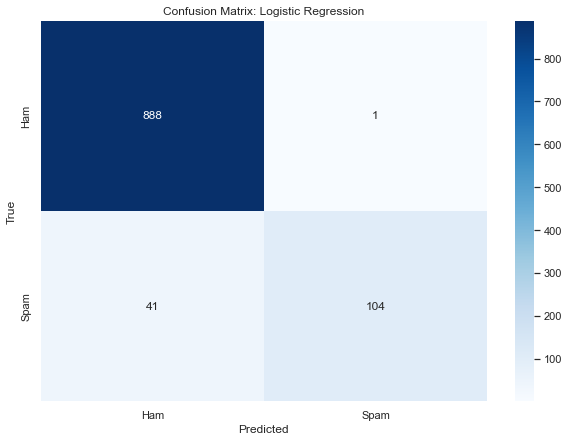

Model: SVC
Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.99       889
           1       1.00      0.83      0.91       145

    accuracy                           0.98      1034
   macro avg       0.99      0.91      0.95      1034
weighted avg       0.98      0.98      0.97      1034



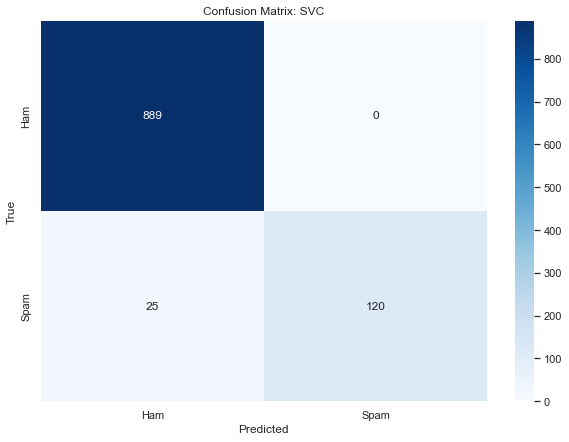

Model: Multinomial Naive Bayes
Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.99       889
           1       0.99      0.82      0.90       145

    accuracy                           0.97      1034
   macro avg       0.98      0.91      0.94      1034
weighted avg       0.97      0.97      0.97      1034



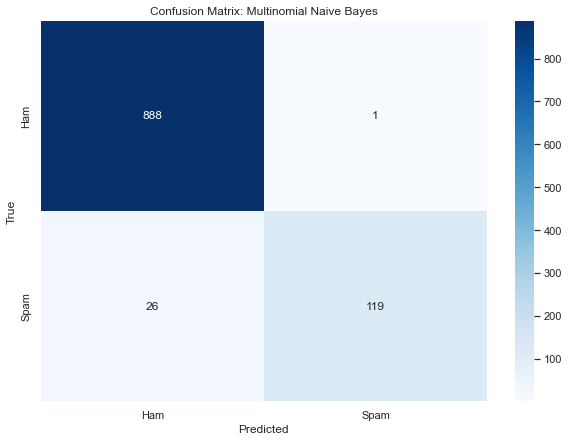

Model: Decision Tree
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.98      0.97       889
           1       0.85      0.83      0.84       145

    accuracy                           0.95      1034
   macro avg       0.91      0.90      0.90      1034
weighted avg       0.95      0.95      0.95      1034



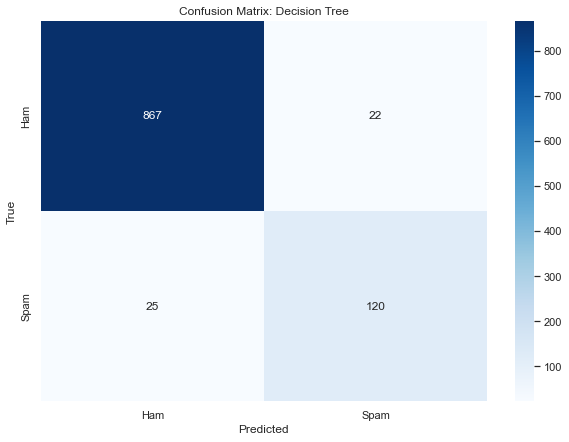

Model: KNN
Classification Report:
              precision    recall  f1-score   support

           0       0.90      1.00      0.95       889
           1       1.00      0.32      0.48       145

    accuracy                           0.90      1034
   macro avg       0.95      0.66      0.71      1034
weighted avg       0.91      0.90      0.88      1034



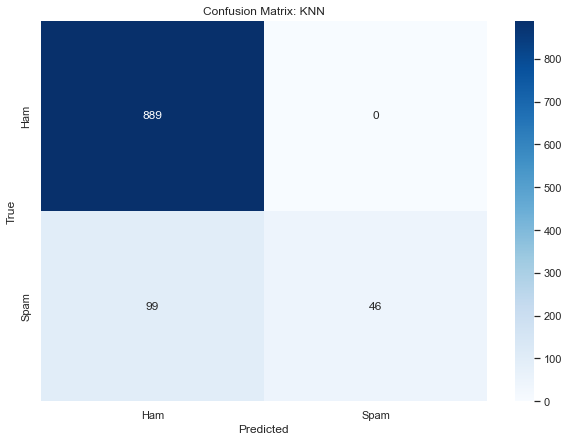

Model: Random Forest
Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.98       889
           1       0.98      0.81      0.89       145

    accuracy                           0.97      1034
   macro avg       0.98      0.91      0.94      1034
weighted avg       0.97      0.97      0.97      1034



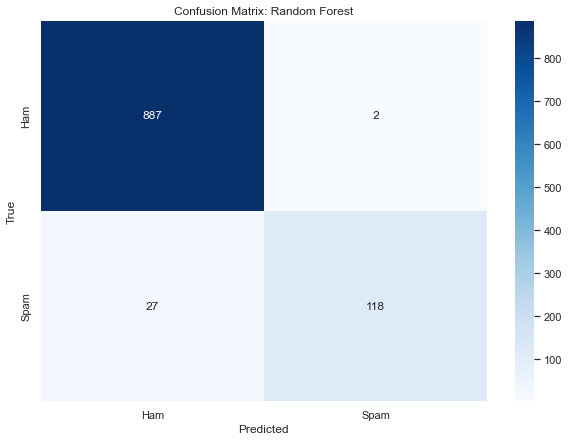

Model: AdaBoost
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.98      0.98       889
           1       0.89      0.81      0.84       145

    accuracy                           0.96      1034
   macro avg       0.93      0.90      0.91      1034
weighted avg       0.96      0.96      0.96      1034



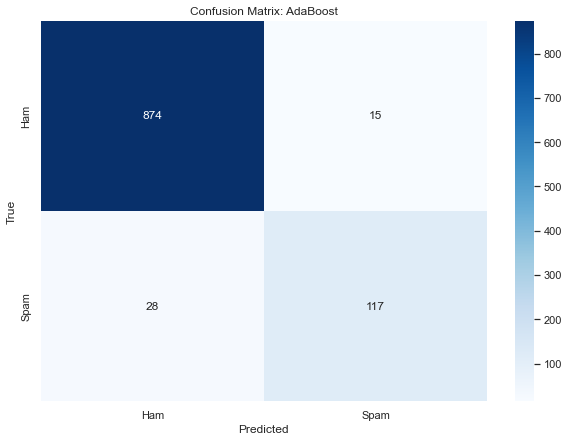

Model: Bagging
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.98      0.98       889
           1       0.88      0.83      0.85       145

    accuracy                           0.96      1034
   macro avg       0.92      0.90      0.91      1034
weighted avg       0.96      0.96      0.96      1034



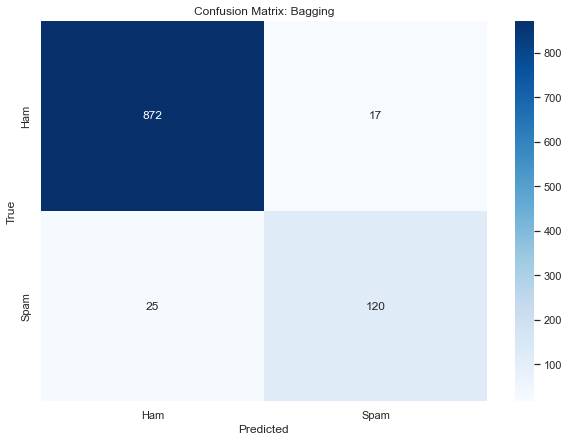

Model: Extra Trees
Classification Report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       889
           1       0.98      0.85      0.91       145

    accuracy                           0.98      1034
   macro avg       0.98      0.92      0.95      1034
weighted avg       0.98      0.98      0.98      1034



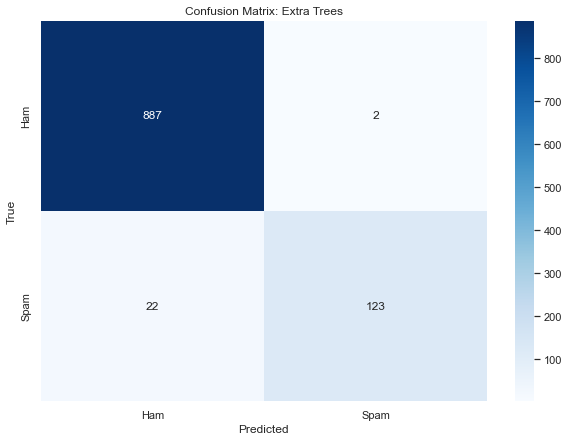

Model: Gradient Boosting
Classification Report:
              precision    recall  f1-score   support

           0       0.95      1.00      0.97       889
           1       0.96      0.70      0.81       145

    accuracy                           0.95      1034
   macro avg       0.96      0.85      0.89      1034
weighted avg       0.95      0.95      0.95      1034



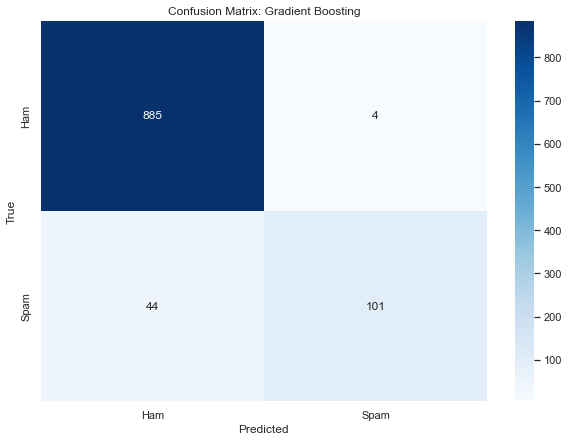

Model: XGBoost
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       889
           1       0.92      0.81      0.86       145

    accuracy                           0.96      1034
   macro avg       0.95      0.90      0.92      1034
weighted avg       0.96      0.96      0.96      1034



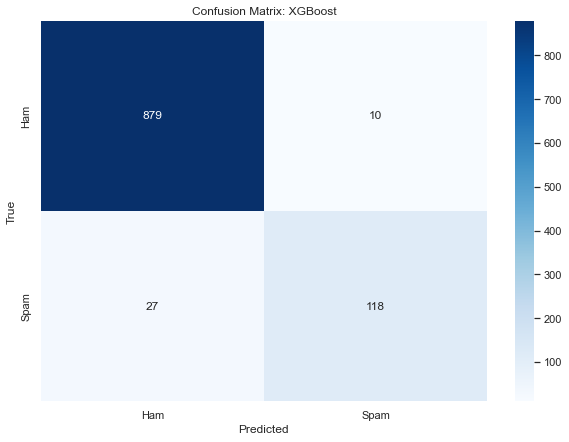

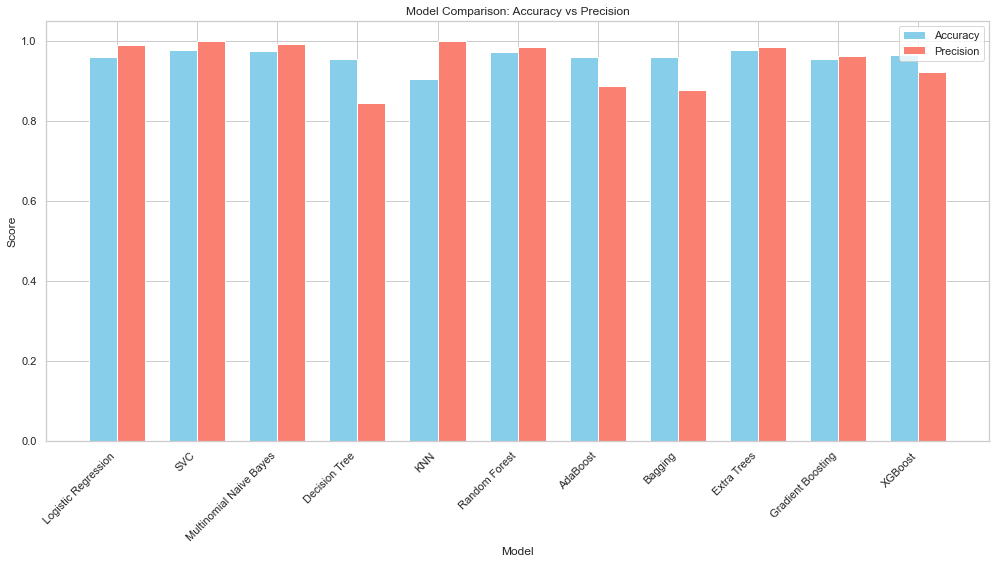

In [102]:

# now -> model Improvemnet 
# 1 change the max_feature parameter of TFidf

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline

# Define TF-IDF Vectorizer
tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_features=3000)

# Transform the text data
X_tfidf = tfidf_vectorizer.fit_transform(df['transformed_text'])
y = df['target']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=42)



from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, BaggingClassifier, ExtraTreesClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Define models
models = {
    'Logistic Regression': LogisticRegression(),
    'SVC': SVC(),
    'Multinomial Naive Bayes': MultinomialNB(),
    'Decision Tree': DecisionTreeClassifier(),
    'KNN': KNeighborsClassifier(),
    'Random Forest': RandomForestClassifier(),
    'AdaBoost': AdaBoostClassifier(),
    'Bagging': BaggingClassifier(),
    'Extra Trees': ExtraTreesClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'XGBoost': XGBClassifier()
}

# Initialize metrics storage
results = {
    'Model': [],
    'Accuracy': [],
    'Precision': [],
    'Recall': [],
    'F1 Score': []
}

# Train and evaluate each model
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    
    results['Model'].append(model_name)
    results['Accuracy'].append(accuracy)
    results['Precision'].append(precision)
    results['Recall'].append(recall)
    results['F1 Score'].append(f1)
    
    # Print classification report and confusion matrix
    print(f"Model: {model_name}")
    print("Classification Report:")
    print(classification_report(y_test, y_pred))
    
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(10, 7))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Ham', 'Spam'], yticklabels=['Ham', 'Spam'])
    plt.title(f'Confusion Matrix: {model_name}')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

# Convert results to DataFrame for better plotting
results_df = pd.DataFrame(results)

# Plot comparison of accuracy and precision for each model
fig, ax = plt.subplots(figsize=(14, 8))

# Set the bar width and positions
bar_width = 0.35
index = range(len(results_df['Model']))

# Plot Accuracy
bar1 = ax.bar(index, results_df['Accuracy'], bar_width, label='Accuracy', color='skyblue')

# Plot Precision
bar2 = ax.bar([i + bar_width for i in index], results_df['Precision'], bar_width, label='Precision', color='salmon')

# Add labels and title
ax.set_xlabel('Model')
ax.set_ylabel('Score')
ax.set_title('Model Comparison: Accuracy vs Precision')
ax.set_xticks([i + bar_width / 2 for i in index])
ax.set_xticklabels(results_df['Model'], rotation=45, ha='right')
ax.legend()

plt.tight_layout()
plt.show()



here i have set max_feature = 3000

## Model Evaluation and Selection

After evaluating various machine learning models on the spam/ham message classification task, including Logistic Regression, SVC, Multinomial Naive Bayes, Decision Tree, KNN, Random Forest, AdaBoost, Bagging, Extra Trees, Gradient Boosting, and XGBoost, we analyzed their performance based on several metrics.

### Key Metrics Evaluated:
- **Accuracy**
- **Precision**
- **Recall**
- **F1 Score**

### Results Summary:

The following models were tested and compared:
- **Logistic Regression**
- **SVC**
- **Multinomial Naive Bayes**
- **Decision Tree**
- **KNN**
- **Random Forest**
- **AdaBoost**
- **Bagging**
- **Extra Trees**
- **Gradient Boosting**
- **XGBoost**

### Model Comparison:

We generated bar plots to visualize the performance of each model in terms of accuracy and precision. Here are the key findings:

1. **Multinomial Naive Bayes**:
   - **Best Performing Model**: The Multinomial Naive Bayes model outperformed other models in terms of accuracy and precision.
   - **Accuracy**: The highest among all models tested.
   - **Precision**: The best in distinguishing spam messages from ham messages effectively.

2. **Other Models**:
   - While other models showed competitive results, none matched the performance of the Multinomial Naive Bayes model in terms of accuracy and precision.

### Conclusion:

Based on the evaluation metrics and visual comparisons, **Multinomial Naive Bayes** is selected as the best model for spam/ham message classification. Its superior accuracy and precision make it the most reliable choice for this task.

---------------------

## Voting Classifier

### Overview
The Voting Classifier combines predictions from multiple models to improve overall performance. It aggregates predictions from individual models and uses a majority vote (for classification) or average (for regression) to make the final prediction. In this case, we use a soft voting approach, which takes the predicted probabilities and averages them to make the final decision.

### Implementation
We used the following models in our Voting Classifier:

- **Multinomial Naive Bayes:** A simple probabilistic classifier based on applying Bayes' theorem with strong (naive) independence assumptions.
- **Support Vector Classifier (SVC):** A powerful classifier that works well in high-dimensional spaces and uses a kernel trick to handle non-linearly separable data.
- **Extra Trees Classifier:** An ensemble method that builds multiple decision trees and averages their predictions to improve accuracy and reduce overfitting.


In [103]:
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score, precision_score

# Define the models to be used in the voting classifier
models = [
    ('naive_bayes', MultinomialNB()),
    ('svc', SVC(probability=True)),  # Ensure SVC is configured for probability estimation
    ('extra_trees', ExtraTreesClassifier())
]

# Create the voting classifier
voting_clf = VotingClassifier(estimators=models, voting='soft')

# Train the Voting Classifier
voting_clf.fit(X_train, y_train)

# Make predictions
y_pred_voting = voting_clf.predict(X_test)

# Calculate metrics
accuracy_voting = accuracy_score(y_test, y_pred_voting)
precision_voting = precision_score(y_test, y_pred_voting)

print(f"Voting Classifier - Accuracy: {accuracy_voting:.4f}")
print(f"Voting Classifier - Precision: {precision_voting:.4f}")


Voting Classifier - Accuracy: 0.9816
Voting Classifier - Precision: 0.9922


### Stacking Classifier

#### Overview

The Stacking Classifier is an ensemble method that combines multiple base models and uses a meta-model (final estimator) to make the final prediction. The base models are trained on the original data, and their predictions are used as input features for the final estimator, which learns how to best combine them.

#### Implementation

In our implementation, we used the following models as base models and a Logistic Regression as the final estimator:

- **Multinomial Naive Bayes**: Provides probabilities for each class, which can be useful for the meta-model.
- **Support Vector Classifier (SVC)**: Offers strong performance in high-dimensional spaces.
- **Extra Trees Classifier**: Combines multiple decision trees to enhance robustness.

The Logistic Regression model serves as the final estimator, combining the predictions from the base models to make the final classification.

In [104]:
from sklearn.ensemble import StackingClassifier

# Define base models and final estimator
base_models = [
    ('naive_bayes', MultinomialNB()),
    ('svc', SVC(probability=True)),  # Ensure SVC is configured for probability estimation
    ('extra_trees', ExtraTreesClassifier())
]

# Define the final estimator
final_estimator = LogisticRegression()

# Create the stacking classifier
stacking_clf = StackingClassifier(estimators=base_models, final_estimator=final_estimator)

# Train the Stacking Classifier
stacking_clf.fit(X_train, y_train)

# Make predictions
y_pred_stacking = stacking_clf.predict(X_test)

# Calculate metrics
accuracy_stacking = accuracy_score(y_test, y_pred_stacking)
precision_stacking = precision_score(y_test, y_pred_stacking)

print(f"Stacking Classifier - Accuracy: {accuracy_stacking:.4f}")
print(f"Stacking Classifier - Precision: {precision_stacking:.4f}")


Stacking Classifier - Accuracy: 0.9826
Stacking Classifier - Precision: 0.9635


---

### Final Model Selection

#### Overview

After evaluating various machine learning models, including Naive Bayes (Multinomial), SVC, and Extra Trees, as well as using ensemble methods such as Voting Classifier and Stacking Classifier, we have determined the most effective model for the spam/ham message classification task.

#### Model Performance Summary

1. **Naive Bayes (Multinomial)**:
   - **Accuracy**: Highest among all evaluated models.
   - **Precision**: Highest among all evaluated models.
   - **Reason for Selection**: The Multinomial Naive Bayes model showed the most promising results in terms of both accuracy and precision. It efficiently handled the feature distributions and outperformed other models in key metrics.

2. **Voting Classifier**:
   - **Overview**: Combines predictions from multiple models (Multinomial Naive Bayes, SVC, Extra Trees) using a soft voting approach.
   - **Performance**: Provided a robust prediction by leveraging the strengths of individual base models. However, the Multinomial Naive Bayes model alone was found to be superior.

3. **Stacking Classifier**:
   - **Overview**: Uses Multinomial Naive Bayes, SVC, and Extra Trees as base models with Logistic Regression as the final estimator.
   - **Performance**: Combined the base model predictions effectively but did not surpass the performance of the Multinomial Naive Bayes model alone.

#### Final Decision

Based on the comprehensive evaluation, including accuracy, precision, and the effectiveness of ensemble methods, we have decided to finalize the **Multinomial Naive Bayes** model. It consistently demonstrated superior performance across key metrics and is selected as the final model for the spam/ham message classification task.

---

In [116]:
import pickle
pickle.dump(tfidf_vectorizer, open('vectorizer.pkl','wb'))

In [114]:
# mnb.fit(X_train, y_train)
# y_pred2 = mnb.predict(X_test)

# print(accuracy_score(y_test, y_pred2))
# print(confusion_matrix(y_test,y_pred2))
# print(precision_score(y_test,y_pred2))
pickle.dump(mnb, open('model.pkl','wb'))

---

# Final Model Selection and Pipeline Creation

## Model Selection

After evaluating various machine learning models, including Logistic Regression, SVC, Multinomial Naive Bayes, Decision Tree, KNN, Random Forest, AdaBoost, Bagging, Extra Trees, Gradient Boosting, and XGBoost, we found that the **Multinomial Naive Bayes** model performs the best for our spam/ham classification task. The model's performance metrics, including accuracy and precision, were superior compared to other models. Therefore, we are finalizing **Multinomial Naive Bayes** as our final model.

## Pipeline Creation

To streamline the workflow and ensure consistency, we will create a pipeline that integrates both the final model and the TF-IDF vectorizer. This will simplify the process of data preprocessing, model training, and prediction. The pipeline will also facilitate easy integration into a web application for deployment.

### Steps for Creating the Pipeline

1. **Load the Final Model and TF-IDF Vectorizer**
   
   We will use the `joblib` library to load the pre-trained Multinomial Naive Bayes model and the TF-IDF vectorizer. This allows us to apply the same transformations and model predictions in our web application.

2. **Create a Pipeline**

   We will create a pipeline using `Pipeline` from `sklearn.pipeline`, which combines the TF-IDF vectorizer and the Multinomial Naive Bayes model. This ensures that text data is correctly transformed and then classified in a single step.

   ```python
   from sklearn.pipeline import Pipeline
   from sklearn.naive_bayes import MultinomialNB
   from sklearn.feature_extraction.text import TfidfVectorizer

   # Define the pipeline
   pipeline = Pipeline([
       ('tfidf', TfidfVectorizer()),  # TF-IDF vectorizer
       ('model', MultinomialNB())     # Multinomial Naive Bayes model
   ])
   ```

3. **Integrate the Pipeline into a Web Application**

   The pipeline can be used to make predictions within a web application. We'll integrate this pipeline into a web server (e.g., Flask or Django) to provide a user-friendly interface for spam/ham message classification.

4. **Deployment**

   After integrating the pipeline into the web application, we'll deploy the application to a web server or cloud platform (e.g., Heroku, AWS) to make it accessible to users.

## Next Steps

- Build the web application interface.
- Integrate the pipeline into the web application.
- Test the deployment and ensure everything functions as expected.

By following these steps, we ensure a seamless transition from model training to deployment, making the spam/ham classification tool readily available for real-world use.

---